In [1]:
from src.utils.input import *
%run "docs\src\utils\notebook_style.ipynb"


c:\Users\Pascal Gitz\OneDrive - Hochschule Luzern\02_Master\03_Tragverhalten_von_Stahlbetontragwerken\docs\src\utils\input.py:75: SyntaxWarning: invalid escape sequence '\,'
  diam_s, diam_s_1, diam_s_2 = sp.symbols("\\oslash_s \\oslash_s\,1 \\oslash_s\,2")
c:\Users\Pascal Gitz\OneDrive - Hochschule Luzern\02_Master\03_Tragverhalten_von_Stahlbetontragwerken\docs\src\utils\input.py:79: SyntaxWarning: invalid escape sequence '\,'
  w_1, w_1_gerissen_norm = sp.symbols("w_1 w_1_II\,SIA")
c:\Users\Pascal Gitz\OneDrive - Hochschule Luzern\02_Master\03_Tragverhalten_von_Stahlbetontragwerken\docs\src\utils\input.py:82: SyntaxWarning: invalid escape sequence '\,'
  V_R_s = sp.symbols("V_R\,s")
c:\Users\Pascal Gitz\OneDrive - Hochschule Luzern\02_Master\03_Tragverhalten_von_Stahlbetontragwerken\docs\src\utils\input.py:84: SyntaxWarning: invalid escape sequence '\,'
  "f_ct f_cc f_c f_sy\,1 f_sy\,2 f_sy f_su f_su\,1 f_su\,2"
c:\Users\Pascal Gitz\OneDrive - Hochschule Luzern\02_Master\03_Tragverha

In [2]:
params_krummung, params_zustandslinien, Laststufen = load_params_A3()

In [3]:
params = dict(params_krummung)
params.update(params_zustandslinien)

params_plot = param_value(params)

# Dreipunktbiegeversuch{#sec-dreipunkt}

In diesem Kapitel werden alle in @sec-modellbeschrieb beschriebenen Modellvorstellungen auf einen Dreipunktbiegeversuch angewendet. Das primäre Ziel ist es, die Differenzen zwischen den mit den verschiedenen Modellvorstellungen berechneten Verformungen und den tatsächlich gemessenen Verformungen aufzuzeigen.
Der Schwerpunkt liegt auf der Anwendung der Modellvorstellungen. Das Kapitel endet mit einem Vergleich der verschiedenen Modellvorstellungen und einer Diskussion der Ergebnisse.

## Versuchsbeschreibung

Der Versuch A3 in der zweiten Versuchsanordnung (kurz A3V2) aus @Jaeger2006 dient als Grundlage. Der Körper wurde in der ersten Versuchsanordnung bereits belastet, jedoch unterschiedlich gelagert. Trotzdem führt dies zu Vorverformungen in der zweiten Versuchsanordnung. 

Im Folgenden sind die wesentlichen Eckdaten des Versuchs dargestellt, während detaillierte Beschreibungen in @Jaeger2006 zu finden sind. Der Versuch beinhaltet einen Plattenstreifen, dessen Lagerung einem Dreipunktbiegeversuch entspricht. Der Plattenstreifen wird durch $F_A$ bis zum Bruch belastet. Die maximale Last beträgt $331 \text{ kN}$. Dargestellt ist dies in @fig-lagerung_a3v2, die Hauptabmessungen dazu sind in @fig-system_2 aufgezeigt.

![Lagerung und Belastung des Plattenstreifens, entnommen aus @Jaeger2006](../images/belastung_a3v2.svg){#fig-lagerung_a3v2}

Das Bewehrungslayout ist so konzipiert, dass nur eine Zugbewehrung im Bereich der negativen Momente vorhanden ist. Die Bewehrung ist orthogonal bzw. parallel zu den Bauteilkanten verlegt. Dargestellt ist die Bewehrungsführung in der @fig-bewehrung_a3v2.

![Bewehrungslayout des Plattenstreifens, entnommen aus @Jaeger2006](../images/bewehrung_a3v2.svg){#fig-bewehrung_a3v2}

Die vorhandene Querkraftbewehrung, ausgeführt als Schubdübel, ermöglicht ein weitgehend durch Biegung verursachtes Versagen. Dies entspricht der Abgrenzung, primär Biegeverformungen zu betrachten. Das Last-Verformungs-Verhalten an der Stelle $w_1$ ist in der @fig-lastverformung_a3v2 dargestellt. Es zeigt sich ein deutlicher Bereich des Fliessens der Zugbewehrung ohne vorzeitiges Querkraftversagen. Erkennbar ist dies an der Erhöhung der Verformung ohne markante Steigerung der Last. Aufgezeigt ist ebenfalls die Vorverformung aus der ersten Versuchsanordnung.

![Last-Verformungs-Verhalten des Plattenstreifens, entnommen aus @Jaeger2006](../images/eth-28720-01_versuche_jaeger103.svg){height=90mm #fig-lastverformung_a3v2}

In @fig-verformungsverlauf_a3v2 ist der Verformungsverlauf entlang der Stabachse dargestellt. Der Verlauf zeigt, dass die maximalen Verformungen bei der Krafteinleitung entstehen.

![Verformungsverlauf des Plattenstreifens, entnommen aus @Jaeger2006](../images/eth-28720-01_versuche_jaeger104.svg){#fig-verformungsverlauf_a3v2}



## Eigenschaften der Baustoffe

Die Betoneigenschaften wurden in @Jaeger2006 mittels Würfel- und Zylinderproben ermittelt. Ebenso wurden die Eigenschaften des Betonstahls durch Zugproben bestimmt. Um von den Druckfestigkeiten der Zylinderproben auf die Bauteildruckfestigkeit zu schliessen, sind in @Jaeger2014 Transformationsbeziehungen beschrieben. Folgend ist die Anwendung dieser aufgezeigt. Die Betondruckfestigkeit aufgrund der Zylinderdruckfestigkeit entspricht:


In [4]:
eq_f_c = sp.Eq(f_c, 2.7*f_cc **sp.Rational(2,3))
eq_f_c_num = sp.Eq(f_c,eq_f_c.subs(params).subs(unit.N,1).subs(unit.mm,1).rhs*unit.N/unit.mm**2)
Eq_list.append(eq_f_c_num)
params[f_c] = eq_f_c_num.rhs
display(eq_f_c, eq_f_c_num.evalf(3))

              2/3
f_c = 2.7⋅f_cc   

      40.8⋅newton
f_c = ───────────
                2
      millimeter 

Ebenfalls kann die Zugfestigkeit gemäss @Jaeger2013 anhand der Zylinderdruckfestigkeit bestimmt werden.

In [5]:
eq_fct = sp.Eq(f_ct, 0.3*f_cc **sp.Rational(2,3))
eq_fct_num = sp.Eq(f_ct, eq_fct.subs(params).rhs.args[0]*unit.N/unit.mm**2)
params[f_ct] = eq_fct_num.rhs
display(eq_fct, eq_fct_num.evalf(3))

               2/3
f_ct = 0.3⋅f_cc   

       4.54⋅newton
f_ct = ───────────
                 2
       millimeter 

Abschliessend wir der Elastizitätsmodul nach @Jaeger2013 abgeschätzt.

In [6]:
eq_Ec = sp.Eq(E_c, 10000*f_cc**sp.Rational(1,3))
eq_Ec_num = sp.Eq(E_c,eq_Ec.subs(params).rhs.args[0]*unit.N/unit.mm**2)
params[E_c] = eq_Ec_num.rhs
display(eq_Ec, eq_Ec_num.evalf(5))

            3 ______
E_c = 10000⋅╲╱ f_cc 

      38886.0⋅newton
E_c = ──────────────
                 2  
       millimeter   

## Reiner Biegeträger

In diesem Abschnitt wird die in @sec-kontinua beschriebene Modellvorstellung auf das Versuchsobjekt angewendet. Zunächst wird das statische System des Versuchs in @fig-system_2 dargestellt.

![Statisches System des Plattenstreifens](../images/System_anordnung_2.svg){#fig-system_2}

Eine Vereinfachung des in @fig-system_2 dargestellten Systems ist in @fig-system_2_lager zu sehen. Dabei wird das Eigengewicht aufgrund seines minimalen Einflusses auf das Biegemoment vernachlässigt. Darüber hinaus wurden die Verformungen, die in @Jaeger2006 gemessen wurden, nach der Installation des Trägers erfasst. Daher spiegelt die Messung den Einfluss des Eigengewichts nicht wider.

$$
g_M, g_{k1}, g_{k2} = 0
$${#eq-eigengewicht}

Die Berücksichtigung der Lagerbreiten führt zur Streckenlast $f_A$, bzw. zu den Lagerreaktionen $f_B$ und $f_C$. Aufgezeigt ist dies in der @fig-system_2_lager.

![Angepasstes statisches System des Plattenstreifens](../images/System_anordnung_2_lagerbreite.svg){#fig-system_2_lager}

Die nun folgenden Berechnungen beziehen sich ausschliesslich auf das System in der @fig-system_2_lager. Dabei werden die Parameter in der @tbl-params_reiner_biegetraeger berücksichtigt.


In [7]:
#| label: tbl-params_reiner_biegetraeger
#| tbl-cap: Berechnungsparameter der Systemgeometrie


dict_to_table(params_zustandslinien)

|  Parameter  | ​  |
|---|---|
| $a_{1} = 0.11 \text{m}$ | $a_{2} = 0.64 \text{m}$ |
| $a_{3} = 0.92 \text{m}$ | $a_{4} = 0.95 \text{m}$ |
| $b = 800.0 \text{mm}$ | $b_{Auflager} = 100 \text{mm}$ |
| $h = 200.0 \text{mm}$ | ​  |


### Auflagerkräfte

Zunächst müssen die Einwirkungen auf den Stab bestimmt werden, dazu sind die Auflagerreaktionen erforderlich. Das statisch bestimmte System kann mithilfe der Gleichgewichtsbeziehungen gelöst werden. Im Folgenden wird die Gesamtlänge des Stabs bestimmt, als Kontrollgrösse der gewählten Abstände.

In [8]:
eq_l_tot = sp.Eq(l_tot, a_1 + a_2+a_3+a_4)
eq_l_tot_num = eq_l_tot.subs(params)
Eq_list.append(eq_l_tot_num)
display(eq_l_tot,eq_l_tot_num.evalf(3))

lₜₒₜ = a₁ + a₂ + a₃ + a₄

lₜₒₜ = 2.62⋅meter

Durch das Aufstellen von Momentengleichgewichten um die Auflagerpunkte $C$ und $B$ können die Beziehungen zwischen den Einwirkungen und den Reaktionskräften ermittelt werden.


In [9]:
eq_ggw_M_C = sp.Eq(0, F_A*a_2-F_B * a_3)
eq_ggw_M_B = sp.Eq(0,F_A * (a_2+a_3)-F_C * a_3)


ggw_solve = sp.solve([eq_ggw_M_C, eq_ggw_M_B], [F_C,F_B])


display(eq_ggw_M_C, eq_ggw_M_B)

0 = F_A⋅a₂ - F_B⋅a₃

0 = F_A⋅(a₂ + a₃) - F_C⋅a₃

Durch das Auflösen der bestimmten Beziehungen folgen die Auflagerreaktionen zu:

In [10]:

eq_F_B = sp.Eq(F_B,ggw_solve[F_B])

eq_F_C = sp.Eq(F_C,ggw_solve[F_C])

display(eq_F_B, eq_F_C)

      F_A⋅a₂
F_B = ──────
        a₃  

      F_A⋅a₂ + F_A⋅a₃
F_C = ───────────────
             a₃      

Wie in @fig-system_2_lager gezeigt, gilt es die Einzelkraft der Auflagerbreite entsprechend zu verteilen. Dies zeigen die folgenden Gleichungen.

In [11]:
eq_f_B = sp.Eq(f_B, F_B/b_auflager).subs(F_B, eq_F_B.rhs)


display(eq_f_B)

          F_A⋅a₂   
f_B = ─────────────
      a₃⋅b_Auflager

In [12]:
eq_f_C = sp.Eq(f_C, F_C/b_auflager).subs(F_C, eq_F_C.rhs)

display(eq_f_C)

      F_A⋅a₂ + F_A⋅a₃
f_C = ───────────────
       a₃⋅b_Auflager 

In [13]:
eq_f_A = sp.Eq(f_A, F_A/b_auflager)
display(eq_f_A)

         F_A    
f_A = ──────────
      b_Auflager

### Zustandslinien

#### Zustandslinien der Schnittgrössen

Nach dem Bestimmen der Auflagerreaktionen können die Zustandslinien der Schnittgrössen bestimmt werden. Die Zustandslinien der Schnittgrössen resultieren aus der Bemühung der hergeleiteten Gleichungen in @sec-kontinua. Dabei ist zu beachten, dass die Zustandslinien lediglich für die maximal gewählte Laststufe dargestellt sind. Der Verlauf der Einwirkungen ist in @fig-q_x aufgezeigt.

In [14]:
DGL_biegetraeger = sp.Eq(q_x, -EI_I*sp.Derivative(w,x,4))


In [15]:
eq_q_x = sp.Eq(q_x, sp.Piecewise(
    (0, (x>0)&(x<=(a_1 - b_auflager/2))),
    (eq_f_A.rhs, (x>(a_1 - b_auflager/2))&(x<(a_1 + b_auflager/2))),
    (0, (x>(a_1 + b_auflager/2))&(x<((a_1+a_2) - b_auflager/2))),
    (-eq_f_C.rhs, (x>((a_1+a_2) - b_auflager/2))&(x<((a_1+a_2)+ b_auflager/2))),
    (0, (x>((a_1+a_2)+ b_auflager/2))&(x<((a_1+a_2+a_3) - b_auflager/2))),
    (eq_f_B.rhs, (x>((a_1+a_2+a_3) - b_auflager/2))&(x<((a_1+a_2+a_3) + b_auflager/2))),
    (0, True)
    )).simplify()

params_plot = param_value(params)
eq_q_x_num = eq_q_x.subs(params_plot)
Eq_list.append(eq_q_x_num)

In [16]:
x_array = np.linspace(0,np.float64((eq_l_tot.rhs).subs(params_plot)),4000)


q_x_lamb = sp.lambdify((F_A, x),eq_q_x_num.rhs, 'numpy')
q_x_array = []
for Last in Laststufen:
    q_x_array.append(q_x_lamb(Last, x_array))


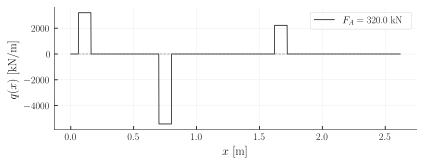

In [17]:
#| label: fig-q_x
#| fig-cap: Verlauf der Einwirkungen
plt.plot(x_array, q_x_array[-1]/1000, color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')

plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(q_x)}$ [kN/m]')
plt.legend()
plt.savefig('images/q_x.svg')

plt.show()


Das Vorzeichen der Streckenlast gibt die Wirkungsrichtung an. Negative Werte wirken entgegen der positiven $z$-Richtung. Die positive $z$-Richtung ist in @fig-system_2_lager dargestellt. Basierend auf dem Verlauf der Einwirkungen lässt sich der Verlauf der Querkraft bestimmen. Durch Integration der Einwirkung über die Laufvariable $x$ ergibt sich der Verlauf, wie in @eq-vx_integriert dargestellt.

$$
V(x) = -\int q(x) \, dx + c_1
$${#eq-vx_integriert}

Mit der Randbedingung $V(0) = 0$ kann die Integrationskonstante bestimmt werden. Der Verlauf der Querkräfte ist in @fig-v_x dargestellt. Die Querkräfte wirken in $z$-Richtung.


In [18]:
eq_V_x = sp.Eq(-V_x,sp.integrate(eq_q_x_num.rhs, x) + c_1)

c_1_num = sp.solve(eq_V_x.rhs.subs(x,0).subs(params),c_1)[0]

V_x_solve = eq_V_x.subs(c_1, c_1_num).simplify()

V_x_lamb = sp.lambdify((F_A,x),V_x_solve.rhs, 'numpy')

V_x_array =[]
for Last in Laststufen:
    V_x_array.append(V_x_lamb(Last,x_array))

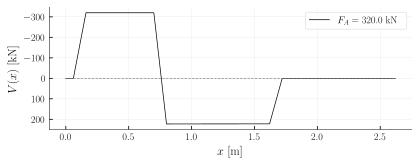

In [19]:
#| label: fig-v_x
#| fig-cap: Verlauf der Querkräfte 

plt.plot(x_array, V_x_array[-1]/1000, color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')

plt.gca().invert_yaxis()
plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(V_x)}$ [kN]')
plt.legend()
plt.savefig('images/V_x.svg')

plt.show()


Nach dem bestimmten Querkraftverlauf folgt der Biegemomentenverlauf unter der Bemühung der @eq-m_x_a3v2. Dazu ist der Verlauf der Querkräfte zu integrieren.

$$
M(x) = \int V(x) \, dx + c_2
$${#eq-m_x_a3v2}

Mit der Randbedingung $M(0) = 0$ kann die Integrationskonstante bestimmt werden. Der Verlauf der Biegemomente ist in @fig-m_x dargestellt. Es ergibt sich ein Minimum über dem Auflager $C$.


In [20]:
eq_M_x = sp.Eq(M_x, sp.integrate(V_x_solve.rhs,x)+c_2)
c_2_num = sp.solve(eq_M_x.subs(x,0).rhs.subs(params), c_2)[0]
M_x_solve = eq_M_x.subs(c_2, c_2_num).simplify()
M_x_lamb = sp.lambdify((F_A, x),M_x_solve.rhs, 'numpy')


M_x_array = []
for Last in Laststufen:
    M_x_array.append(M_x_lamb(Last, x_array))


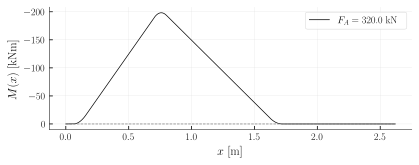

In [21]:
#| label: fig-m_x
#| fig-cap: Verlauf der Biegemomente 

plt.plot(x_array, M_x_array[-1]/1000, color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')

plt.gca().invert_yaxis()
plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(M_x)}$ [kNm]')
plt.legend()
plt.savefig('images/M_x.svg')

plt.show()

Zusätzlich zu den resultierenden Biegemomenten aus der Einwirkung kann ein durch die Längszugkraft aus der Querkraft induziertes Biegemoment ermittelt werden. Dies wird mit einem Versatzmass berücksichtigt. Erläutert ist die Modellvorstellung in @sec-versatzmass. Die @eq-versatzmass zeigt die Ermittlung des Versatzmass. Multipliziert mit der statischen Höhe ergibt sich der Versatz des Biegemoments aus @eq-versatzmoment. In der @fig-m_x_versatz ist die Erhöhung durch das Versatzmass gezeigt. Beim Momentenminimum bildet sich ein Plateau aus. Der notwendige Hebelarm der inneren Kräfte ist anhand der statischen Höhe $d$ abgeschätzt. Die statische Höhe ist in @fig-qs_vereinfachung dargestellt.

In [22]:
theta_c3_num = params[theta_c3]  # in Grad

eq_d = sp.Eq(d,h - c_nom - sp.Rational(1.5) * diam_s)
eq_d_num = eq_d.subs(params)
Eq_list.append(eq_d_num)

    
# Abschätzung des inneren Hebelarms anhand der mittleren statischen Höhe
eq_z_schaetzung = sp.Eq(z, 0.9 * d)
eq_z_schaetzung_num = eq_z_schaetzung.subs(d, eq_d_num.rhs)


# Bestimmung des Versatzmasses
h_versatz = (
    abs(V_x) * sp.cot(sp.rad(theta_c3_num)) / 2 * eq_z_schaetzung_num.rhs.args[0] / 1000
)
h_versatz_lamb = sp.lambdify((V_x), h_versatz, "numpy")

h_versatz_array = []
for V_x in V_x_array:
    h_versatz_array.append(h_versatz_lamb(V_x))

In [23]:
display(eq_d, eq_d_num.evalf(3))

      3⋅\oslashₛ           
d = - ────────── - cₙₒₘ + h
          2                

d = 162.0⋅millimeter

Aus der berechneten statischen Höhe folgt der Hebelarm der inneren Kräfte $z$.

In [24]:
display(eq_z_schaetzung, eq_z_schaetzung_num.evalf(3))

z = 0.9⋅d

z = 146.0⋅millimeter

Zur Bestimmung des Versatzmass gilt es die Neigung des Druckfelds zu ermitteln. Abgeschätzt wird diese mit dem unteren Grenzwert des definierten Bereichs aus der Norm [@SIA2013a, p. 54].

In [25]:
display(Markdown(f'$$\n \\theta_{{c3}} = {theta_c3_num}^{{\\circ}} \n$$'+'{#eq-theta_c3}'))


$$
 \theta_{c3} = 30.0^{\circ} 
$${#eq-theta_c3}

Unter diesen Annahmen folgt der Verlauf der Biegemomente mit dem Versatzmass, dargestellt in der @fig-m_x_versatz.

In [26]:
def calculate_m_c_versatz(mx, versatz):
    
    mx_sol_list = []
    minimum = min(mx)
    for i in range(0,len(mx)):
        if (mx[i] - versatz[i]) <= minimum:
            mx_sol =  minimum
            
        else:
            mx_sol = mx[i]-versatz[i]
        mx_sol_list.append(mx_sol)
    
    return mx_sol_list
    
M_x_array_versatz = []
for i in range(0,len(M_x_array)):
    
    mx_versetzt = calculate_m_c_versatz(M_x_array[i], h_versatz_array[i])
    M_x_array_versatz.append(np.array(mx_versetzt))

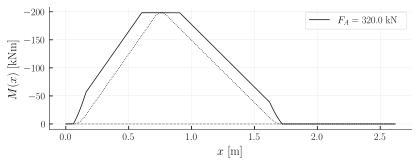

In [27]:
#| label: fig-m_x_versatz
#| fig-cap: Verlauf der Biegemomente, mit Versatzmass
plt.plot(x_array, M_x_array[-1]/1000, color='black', linestyle='dotted')
plt.plot(x_array, M_x_array_versatz[-1]/1000, color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')

plt.gca().invert_yaxis()
plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(M_x)}$ [kNm]')
plt.legend()
plt.savefig('images/M_x_versatz.svg')

plt.show()

In [28]:
eq_phi_x = sp.Eq(phi_x, sp.integrate(M_x_solve.rhs/EI,x)+c_3)


#### Verdrehung- und Verformungslinien

Wie in @sec-kontinua hergeleitet, sind die Gleichgewichtsbetrachtungen nicht ausreichend, um die Verdrehung und Verformung zu beschreiben. Die Werkstoffbeziehung bedingt eine Biegesteifigkeit. Dabei wird von einer konstanten Biegesteifigkeit ausgegangen. Unter der Annahme eines ungerissenen Betonquerschnitts lässt sich die Biegesteifigkeit wie folgt berechnen:

In [29]:
eq_EI = sp.Eq(EI, E_c * b*h**3/12)
eq_EI_num = eq_EI.subs(params)
Eq_list.append(eq_EI_num)


In [30]:
display(eq_EI, unit.convert_to(eq_EI_num.evalf(3), [unit.kilonewton, unit.meter]))

            3
     E_c⋅b⋅h 
EI = ────────
        12   

                             2
EI = 2.07e+4⋅kilonewton⋅meter 

Der Verlauf der Verdrehung entspricht dem integrierten Verlauf der Biegemomente, dividiert durch die Biegesteifigkeit.

$$
\varphi(x) = \frac{1}{EI}\int M(x) \, dx + c_3
$${#eq-verdrehung}

Die Verformung hingegen entspricht dem integrierten Verlauf der Verdrehung.

$$
w(x) = \int -\varphi(x) \, dx + c_4
$${#eq-verformung}

Mit den Randbedingungen $w(C) = 0$ und $w(B) = 0$ können die Integrationskonstanten bestimmt werden. Der elastische Verformungsverlauf, bzw. der mit einer über die Stabachse konstanten Biegesteifigkeit bestimmte Verformungsverlauf, ist in @fig-w_x dargestellt.



In [31]:
eq_w_x = sp.Eq(w_x, -sp.integrate(eq_phi_x.rhs, x)+ c_4)
eq_w_x.subs(params_plot)
c_solve = sp.solve([eq_w_x.rhs.subs(x,a_1 + a_2).subs(params_plot), eq_w_x.rhs.subs(x,a_1 + a_2+a_3).subs(params_plot)],[c_3, c_4])


eq_w_x_solve = eq_w_x.subs(c_solve).subs(params_plot)


w_x_lamb = sp.lambdify((F_A,x, EI),eq_w_x_solve.rhs)

In [32]:
w_x_array_ungerissen = []
for Last in Laststufen:
    w_x_array_ungerissen.append(w_x_lamb(Last, x_array, np.float64(eq_EI.rhs.subs(params_plot))))



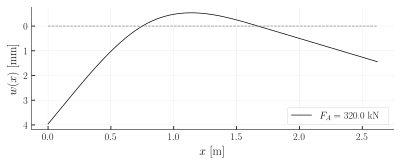

In [33]:
#| label: fig-w_x
#| fig-cap: Verlauf der Verformung, bestimmt mit einer konstanten ungerissenen Biegesteifigkeit

plt.plot(x_array, w_x_array_ungerissen[-1]*1000, color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')
plt.gca().invert_yaxis()

plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(w_x)}$ [mm]')
plt.legend()
plt.savefig('images/w_x.svg')

plt.show()

In [34]:
w_1_elastisch_ungerissen = []
for Last in Laststufen:
    w_1_elastisch_ungerissen.append(w_x_lamb(Last, 0.11, np.float64(eq_EI.rhs.subs(params_plot))))
eq_w_1_elastisch = sp.Eq(w_1,unit.convert_to(w_1_elastisch_ungerissen[-1]*unit.m,unit.mm))


Eq_list.append(eq_w_1_elastisch)


## Mohr'sche Analogie

In diesem Abschnitt sind die Zustandslinien der Schnittgrössen mittels der Mohr'schen Analogie bestimmt. Das Vorgehen ist in @sec-mohrsche_analogie beschrieben. Der bereits bestimmte Momentenverlauf gemäss @fig-m_x, dividiert durch die ungerissene Biegesteifigkeit, ist als Einwirkung auf das System anzusetzen. Dies ist in @fig-q_x_mohr dargestellt.


In [35]:
eq_q_x_mohr = sp.Eq(q_x_a, M_x_solve.rhs / EI)
eq_q_x_mohr_num = eq_subs(eq_q_x_mohr, eq_EI).subs(params_plot)
q_x_mohr_lamb = sp.lambdify((F_A, x), eq_q_x_mohr_num.rhs, 'numpy')

In [36]:
q_x_mohr_array =[]
for Last in Laststufen:
    q_x_mohr_array.append(q_x_mohr_lamb(Last, x_array))
    
    
    

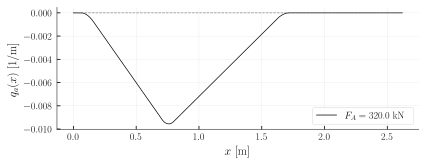

In [37]:
#| label: fig-q_x_mohr
#| fig-cap: Verlauf der Einwirkungen des Analogiesystems
plt.plot(x_array, q_x_mohr_array[-1], color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')

plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(q_x_a)}$ [1/m]')
plt.legend()
plt.savefig('images/q_x_mohr.svg')

plt.show()

Die Randbedingungen bzw. die Lagerungen für das analoge System sind zu ermitteln. Dies kann grundsätzlich mit den Lagerungsbedingungen aus @fig-randbedingungen_analogiesysteme erfolgen. Alternativ sind die folgenden Überlegungen zu berücksichtigen. Es ist bekannt, dass die Verformung an den Auflagern null sein muss. Daher ist es notwendig, ein Biegegelenk an den Positionen der Lager einzufügen. Durch die Einspannungen an den Stabrändern resultiert der passende Verformungsverlauf.

![Einwirkungen und Lagerung des Analogiesystems](../images/System_analog.svg){#fig-system_analog}

In [38]:
eq_V_x_mohr = sp.Eq(V_x_a, -sp.integrate(eq_q_x_mohr_num.rhs, x)+c_1)
eq_M_x_mohr = sp.Eq(M_x_a, sp.integrate(eq_V_x_mohr.rhs, x)+c_2)
randbedingung_1 = sp.Eq(eq_M_x_mohr.rhs.subs(x, a_1 +a_2),0).subs(params_plot)
randbedingung_2 = sp.Eq(eq_M_x_mohr.rhs.subs(x, a_1 +a_2+a_3),0).subs(params_plot)

c_a_solve = sp.solve([randbedingung_1, randbedingung_2],[c_1,c_2])
c_a_solve
eq_V_x_mohr_subs = eq_V_x_mohr.subs(c_a_solve)
eq_M_x_mohr_subs = eq_M_x_mohr.subs(c_a_solve)


V_x_mohr_lamb = sp.lambdify((F_A,x), eq_V_x_mohr_subs.rhs, 'numpy')
M_x_mohr_lamb = sp.lambdify((F_A,x), eq_M_x_mohr_subs.rhs, 'numpy')

In [39]:
V_x_mohr_array =[]
M_x_mohr_array =[]
for Last in Laststufen:
    V_x_mohr_array.append(V_x_mohr_lamb(Last,x_array))
    M_x_mohr_array.append(M_x_mohr_lamb(Last,x_array))

Der Querkraftverlauf für das analoge System ist in @fig-v_x_mohr dargestellt. Die Querkraft ist einheitslos, da sie die Verdrehung des realen Systems repräsentiert.

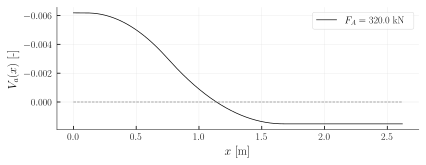

In [40]:
#| label: fig-v_x_mohr
#| fig-cap: Verlauf der Querkräfte des Analogiesystems

plt.plot(x_array, V_x_mohr_array[-1], color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')

plt.gca().invert_yaxis()
plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(V_x_a)}$ [-]')
plt.legend()
plt.savefig('images/V_x_mohr.svg')

plt.show()


Der Biegemomentenverlauf für das analoge System ist in @fig-m_x_mohr dargestellt. Der Momentenverlauf entspricht der Verformung des realen Systems und ist daher in Millimeter angegeben. Der Verlauf der Verformung ist erwartungsgemäss deckungsgleich mit dem aus der Bemühung der Differentialgleichung, aufgezeigt in @fig-m_x.


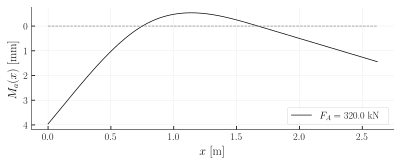

In [41]:
#| label: fig-m_x_mohr
#| fig-cap: Verlauf der Biegemomente des Analogiesystems

plt.plot(x_array, M_x_mohr_array[-1]*1000, color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')

plt.gca().invert_yaxis()
plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(M_x_a)}$ [mm]')
plt.legend()
plt.savefig('images/w_x_mohr.svg')

plt.show()

## Abschätzung nach Norm

Nach der Bestimmung der elastischen Verformung kann die Verformung anhand des vollständig gerissenen Querschnitts gemäss der Betonnorm @SIA2013a ermittelt werden. Erläutert ist das Vorgehen im @sec-norm. Die Druckbewehrung wird für den Versuch vernachlässigt. Ebenso sind keine Langzeiteinflüsse zu berücksichtigen. Dies führt auf die @eq-w_1_II_sia_simple. Der geometrische Bewehrungsgehalt definiert sich folgendermassen.

In [42]:
eq_rho = sp.Eq(rho, A_s/(b*d))
Eq_list.append(eq_rho)
display(eq_rho)

        Aₛ
\rho = ───
       b⋅d

Die dazu benötigte Querschnittsfläche der Stäbe in der Zugzone entspricht dem Folgenden.

In [43]:
eq_A_s = sp.Eq(A_s, sp.Mul(2*b,sp.pi * diam_s **2 / (4 * s_x), evaluate=False))
eq_A_s_num = unit.convert_to(eq_A_s.subs(params), unit.mm)
Eq_list.append(eq_A_s_num)
display(eq_A_s, eq_A_s_num.evalf(4))

                   2
         π⋅\oslashₛ 
Aₛ = 2⋅b⋅───────────
             4⋅sₓ   

                      2
Aₛ = 2262.0⋅millimeter 

Sowie beträgt die bereits ermittelte statische Höhe, dargestellt in @fig-qs_vereinfachung:

In [44]:

display(eq_d_num.evalf(3))


d = 162.0⋅millimeter

Wird für die elastische Verformung $w(0.11)$ des Verlaufs in @fig-w_x eingesetzt, so folgt abschliessend die Verformung mittels der Abschätzformel für die maximale Last an der Stelle $w_1$ zu:

In [45]:
eq_w_1_gerissen_norm = sp.Eq(w_1_gerissen_norm, sp.Mul(0.75/(10*rho)**sp.Rational(0.7) , (h/d)**3 * w_1, evaluate=False))
eq_w_1_gerissen_norm_num = unit.convert_to(eq_subs(eq_w_1_gerissen_norm, *Eq_list).subs(params), unit.mm)
Eq_list.append(eq_w_1_gerissen_norm_num)

w_1_gerissen_norm_lamb = sp.lambdify((w_1),eq_w_1_gerissen_norm.rhs.subs(rho, eq_rho.rhs).subs(d, eq_d_num.rhs.args[0]).subs(A_s, eq_A_s_num.rhs).subs(params).subs(unit.mm,1), 'numpy')

display(eq_w_1_gerissen_norm_num.evalf(3))

w_1_II,SIA = 15.7⋅millimeter

## Numerische Integration der Krümmung

Um sich von der Betrachtung einer konstanten Biegesteifigkeit zu lösen, gilt es eine nicht-lineare Momenten-Krümmungs-Beziehung zu bestimmen. Das @sec-numint zeigt Grundlagen dazu auf. Im Folgenden wird ein Momenten-Krümmungs-Diagramm für den Querschnitt aus dem beschriebenen Versuch berechnet. 

![Querschnitt des Plattenstreifens dargestellt mit Zugbewehrung, ohne Schubbewehrung](../images/QS_Versuch_A3.svg){#fig-qs_a3}

Die vorhandene Schubbewehrung ist in @fig-qs_a3 nicht dargestellt. Zur Reduktion des Berechnungsaufwands wird der Querschnitt gemäss der @fig-qs_vereinfachung vereinfacht.

![Vereinfachung der Bewehrungsführung des Plattenstreifens](../images/QS_analyse_1.svg){#fig-qs_vereinfachung}

Die Parameter aus der @tbl-params_krummung finden Einfluss in die Berechnungen. Neben den Parametern wird das Stoffgesetz für den Betonstahl in @fig-stahlkennlinie hinterlegt. Das bilineare, bzw. linear-elastisch linear-plastische Spannungs-Dehnungs-Diagramm für den Betonstahl hält den Rechenaufwand klein und liefert eine ausreichende Genauigkeit.

In [46]:
#| label: tbl-params_krummung
#| tbl-cap: Berechnungsparameter Momenten-Krümmungs-Beziehung


dict_to_table(params_krummung)

|  Parameter  | ​  |
|---|---|
| $E_{s} = \frac{200000.0 \text{N}}{\text{mm}^{2}}$ | $\oslash_{s} = 12.0 \text{mm}$ |
| $c_{nom} = 20.0 \text{mm}$ | $f_{cc} = \frac{58.8 \text{N}}{\text{mm}^{2}}$ |
| $f_{su} = \frac{630.3 \text{N}}{\text{mm}^{2}}$ | $f_{sy} = \frac{546.0 \text{N}}{\text{mm}^{2}}$ |
| $s_{x} = 80.0 \text{mm}$ | $\theta_{c3} = 30.0$ |
| $\varepsilon_{cu} = 0.005$ | $\varepsilon_{su} = 0.1117$ |


Eine Berücksichtigung des verfestigenden Verhaltens ist essentiell, um die Verformungen nach dem Fliessen des Betonstahls näherungsweise zu bestimmen. Das Diagramm ist definiert bis zur Bruchdehnung $\varepsilon_{su}$ des Stahls. Das Verhalten gilt ebenso im negativen Spannungs-Dehnungs Bereich.

In [47]:
eq_1 = sp.Eq(f_sy, a +b*f_sy/E_s)
eq_2 = sp.Eq(f_su, a + b*epsilon_su)



eq_lin = sp.Eq(sigma_epsilon_s, a + b * epsilon_s).subs(sp.solve([eq_1,eq_2],[a,b]))

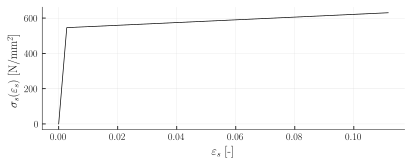

In [48]:
#| label: fig-stahlkennlinie
#| fig-cap: Linear-elastisches, linear-plastisches Spannungs-Dehnungs-Diagramm des Betonstahls 


eq_sigma_epsilon_s = sp.Eq(sigma_epsilon_s, sp.Piecewise(
    (E_s * epsilon_s, (epsilon_s<=f_sy / E_s)&(epsilon_s>=0)),
    (eq_lin.rhs.subs(params_plot), (epsilon_s<=epsilon_su)&(epsilon_s>=f_sy / E_s))
    ))




eq_sigma_epsilon_s_num = eq_sigma_epsilon_s.subs(params_plot) 

eq_sigma_epsilon_s_lamb = sp.lambdify((epsilon_s),eq_sigma_epsilon_s_num.rhs)


epsilon_s_array = np.linspace(0, np.float64(epsilon_su.subs(params_plot)), 2000)
eq_sigma_epsilon_array = eq_sigma_epsilon_s_lamb(epsilon_s_array)


plt.plot(epsilon_s_array, eq_sigma_epsilon_array/1000**2, color='black')

plt.xlabel(f'${sp.latex(epsilon_s)}$ [-]')
plt.ylabel(f'${sp.latex(sigma_epsilon_s)}$ [N/mm$ ^2$]')
plt.savefig('images/spannung_dehnung_stahl.svg')

plt.show()

In [49]:
eq_sigma_epsilon_c = sp.Eq(sigma_epsilon_c,sp.Piecewise((E_c * epsilon_c, (epsilon_c <=f_ct/E_c)&(epsilon_c >-f_c/E_c)), (-f_c, epsilon_c< -f_c/E_c)))


eq_sigma_epsilon_c_num = eq_sigma_epsilon_c.subs(params_plot)



Dem Beton wird die Betonkennlinie, die in @fig-betonkennlinie dargestellt ist, hinterlegt. Diese zeigt ein linear-elastisches ideal-plastisches Verhalten. Im positiven Bereich lässt sich die Betonspannung bis zur Betonzugfestigkeit $f_{ct}$ erhöhen, im negativen Spannungsbereich beginnt ein Plastifizieren beim Erreichen der Betondruckfestigkeit $f_c$. Dies ist bis zur Bruchstauchung $\varepsilon_{cu}$ definiert.

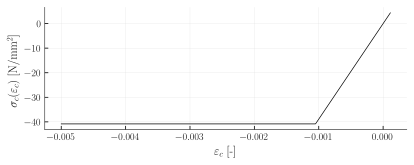

In [50]:
#| label: fig-betonkennlinie
#| fig-cap: Linear-elastisches, ideal-plastisches Spannungs-Dehnungs-Diagramm des Betons 


eq_sigma_epsilon_c_lamb = sp.lambdify((epsilon_c),eq_sigma_epsilon_c_num.rhs)


epsilon_c_array = np.linspace(-np.float64(epsilon_cu.subs(params_plot)), np.float64(epsilon_cu.subs(params_plot)), 2000)
eq_sigma_epsilon_c_array = eq_sigma_epsilon_c_lamb(epsilon_c_array)


plt.plot(epsilon_c_array, eq_sigma_epsilon_c_array/1000**2, color='black')

plt.xlabel(f'${sp.latex(epsilon_c)}$ [-]')
plt.ylabel(f'${sp.latex(sigma_epsilon_c)}$ [N/mm$ ^2$]')
plt.savefig('images/spannung_dehnung_beton.svg')

plt.show()

### Querschnittsanalyse

Basierend auf den eben beschriebenen Grundlagen wird folgend eine Querschnittsanalyse durchgeführt. Dabei wird der Querschnitt vor dem Reissen, nach dem Reissen, beim Fliessen der Zugbewehrung und beim Versagen untersucht. Durch die Wahl aussagekräftiger Zustände im Querschnitt lässt sich eine nicht-lineare Momenten-Krümmungs-Beziehung mit überschaubarem Rechenaufwand ermitteln.

#### Schwerpunkt des Querschnitts

Zunächst sind die Eigenschaften des Querschnitts zu bestimmen. Die Bestimmung der Wertigkeit $n$ ermöglicht die Betrachtung des Querschnitts als homogenen Betonquerschnitt. Diese findet Einfluss bei der Schwerpunktsbestimmung, sowie bei der Bestimmung des Flächenträgheitmoments.

In [51]:
eq_n = sp.Eq(n, E_s / E_c)
eq_n_num = eq_n.subs(params)
Eq_list.append(eq_n_num)



display(eq_n,eq_n_num.evalf(3))

     Eₛ
n = ───
    E_c

n = 5.14

Mithilfe der Querschnittsfläche der Zugstäbe unter Berücksichtigung der Wertigkeit sowie der Betonquerschnittsfläche, lässt sich eine ideelle Querschnittsfläche ermitteln. Die Querschnittsfläche der Zugstäbe ist die folgende:

In [52]:


display(eq_A_s, eq_A_s_num.evalf(4))

                   2
         π⋅\oslashₛ 
Aₛ = 2⋅b⋅───────────
             4⋅sₓ   

                      2
Aₛ = 2262.0⋅millimeter 

Die Betonquerschnittsfläche hingegen beträgt:

In [53]:
eq_A_c = sp.Eq(A_c, b*h)
eq_A_c_num = unit.convert_to(eq_A_c.subs(params), unit.mm)

Eq_list.append(eq_A_c_num)

display(eq_A_c, eq_A_c_num)

A_c = b⋅h

                         2
A_c = 160000.0⋅millimeter 

Und die ideelle Querschnittsfläche resultiert zu:

In [54]:
eq_Ai = sp.Eq(A_i, A_c + A_s *(n-1))
eq_Ai_num = unit.convert_to(eq_subs(eq_Ai, *Eq_list), unit.mm)

Eq_list.append(eq_Ai_num)

display(eq_Ai,eq_Ai_num.evalf(6))

Aᵢ = A_c + Aₛ⋅(n - 1)

                        2
Aᵢ = 169372.0⋅millimeter 

Der vertikale Abstand von der Oberkante zum Schwerpunkt, aufgezeigt in der @fig-qs_a3, beträgt:

In [55]:
eq_zeta_c = sp.Eq(zeta_c, sp.Mul(1/A_i,A_c * h/2 + A_s*(n-1) * (c_nom +1.5*diam_s), evaluate=False))
eq_zeta_c_num = unit.convert_to(eq_subs(eq_zeta_c, *Eq_list).subs(params), unit.mm)

Eq_list.append(eq_zeta_c_num)
display(eq_zeta_c, eq_zeta_c_num.simplify().evalf(3))

      A_c⋅h                                   
      ───── + Aₛ⋅(1.5⋅\oslashₛ + cₙₒₘ)⋅(n - 1)
        2                                     
ζ_c = ────────────────────────────────────────
                         Aᵢ                   

ζ_c = 96.6⋅millimeter

#### Flächenträgheitsmoment

Als weitere Querschnittseigenschaft gilt es das Flächenträgheitsmoment zu berechnen. Dieses wird ebenfalls am ideellen Querschnitt bestimmt. Die Eigenträgheitsmomente der Kreisquerschnitte der Stäbe sind nicht berücksichtigt. Da deren Einfluss vernachlässigbar klein ist. Lediglich der Steiner-Anteil fliesst in die Berechnung ein:

In [56]:
eq_I_1 = sp.Eq(I_1, b * h**3/12 +b*h*(h/2 - zeta_c)**2 + A_s * (n-1) * (c_nom + sp.Rational(1.5)*diam_s - zeta_c)**2)
eq_I_1_num = unit.convert_to(eq_subs(eq_I_1, *Eq_list).subs(params), unit.mm)

Eq_list.append(eq_I_1_num)
display(eq_I_1, eq_I_1_num.evalf(3))


                                           2      3                2
                  ⎛3⋅\oslashₛ             ⎞    b⋅h        ⎛h      ⎞ 
I__I = Aₛ⋅(n - 1)⋅⎜────────── + cₙₒₘ - ζ_c⎟  + ──── + b⋅h⋅⎜─ - ζ_c⎟ 
                  ⎝    2                  ⎠     12        ⎝2      ⎠ 

                         4
I__I = 5.67e+8⋅millimeter 

#### Ungerissen - Zustand 1

Der Zustand 1 betrachtet den Querschnitt unter Biegung vor dem Erreichen der Betonzugfestigkeit. Durch das durchwegs elastische Verhalten kann die Biegesteifigkeit anhand des Elastizitätmoduls des Betons und des Flächenträgheitmoments des ideellen Querschnitts bestimmt werden.

In [57]:
eq_EI_1 = sp.Eq(EI_I, I_1 * E_c)
eq_EI_I_num = eq_subs(eq_EI_1, *Eq_list).subs(params)

Eq_list.append(eq_EI_I_num)


In [58]:

display(eq_EI_1, unit.convert_to(eq_EI_I_num.evalf(4),[unit.kilonewton, unit.meter]))

EI__I = E_c⋅I__I

                                 2
EI__I = 2.206e+4⋅kilonewton⋅meter 

Zugehörig zum Zustand 1 ist das Rissmoment. Das Rissmoment definiert den Endpunkt des Zustands 1 im Momenten-Krümmungs-Diagramm, sprich beim Erreichen der Zugfestigkeit des Betons. Dabei gilt die Modellierung gemäss @fig-qs2. Die Spannung in den Zugstäben wird vernachlässigt.

![Querschnittsanalyse vor dem Reissen des Betons](../images/QS_analyse_2.svg){#fig-qs2}


Die Betondruckspannung lässt sich anhand der über die Querschnittshöhe linear verlaufenden Spannung bestimmen.

In [59]:
eq_sigma_c_inf1 = sp.Eq(sigma_c_1,f_ct / zeta_c * (h-zeta_c))
eq_sigma_c_inf1_num = unit.convert_to(eq_subs(eq_sigma_c_inf1,*Eq_list).subs(params),unit.mm)

Eq_list.append(eq_sigma_c_inf1_num)
display(eq_sigma_c_inf1, eq_sigma_c_inf1_num.evalf(3))


        f_ct⋅(h - ζ_c)
σ_c_1 = ──────────────
             ζ_c      

        4.86⋅newton
σ_c_1 = ───────────
                  2
        millimeter 

Zur Bestimmung des Rissmoments gilt es den Hebelarm der inneren Kräfte zu definieren:

In [60]:
eq_z_r = sp.Eq(z_1, h - ((h-zeta_c)/3 + c_nom + 3/2 * diam_s))
eq_z_r_num = unit.convert_to(eq_subs(eq_z_r, *Eq_list).subs(params), unit.mm)
Eq_list.append(eq_z_r_num)
display(eq_z_r, eq_z_r_num.evalf(3))

                            2⋅h   ζ_c
z₁ = -1.5⋅\oslashₛ - cₙₒₘ + ─── + ───
                             3     3 

z₁ = 128.0⋅millimeter

Die Betondruckkraft lässt sich anhand der Betondruckspannung und der Betonfläche bestimmen:

In [61]:
eq_F_c_r = sp.Eq(F_c1,  sigma_c_1 * b * (h-zeta_c)/2)
eq_F_c_r_num = eq_subs(eq_F_c_r, *Eq_list).subs(params)

Eq_list.append(eq_F_c_r_num)
display(eq_F_c_r, unit.convert_to(eq_F_c_r_num.evalf(3), unit.kilonewton))


        b⋅σ_c_1⋅(h - ζ_c)
F_c,1 = ─────────────────
                2        

F_c,1 = 201.0⋅kilonewton

Und das Rissmoment resultiert schliesslich zu:

In [62]:
eq_M_r = sp.Eq(M_r, F_c1 * z_1)
eq_M_r_num = eq_subs(eq_M_r, *Eq_list)
Eq_list.append(eq_M_r_num)


In [63]:

display(eq_M_r, unit.convert_to(eq_M_r_num.evalf(4), [unit.kilonewton, unit.meter]))

Mᵣ = F_c,1⋅z₁

Mᵣ = 25.63⋅kilonewton⋅meter

Unter Berücksichtigung der Biegesteifigkeit lässt sich die Krümmung beim Reissen des Querschnitts bestimmen.

In [64]:
eq_chi_r = sp.Eq(chi_r, M_r / (EI_I))
eq_chi_r_num = unit.convert_to(eq_subs(eq_chi_r, *Eq_list), unit.m)

Eq_list.append(eq_chi_r_num)
display(eq_chi_r,eq_chi_r_num.evalf(3))

          Mᵣ 
\chiᵣ = ─────
        EI__I

        0.00116
\chiᵣ = ───────
         meter 

#### Gerissen elastisch - Zustand 2

Mit dem Zustand 2 wird darauf abgezielt, den gerissenen Bereich im Momenten-Krümmungs-Diagramm darzustellen. Der Querschnitt nach dem Reissen ist in der @fig-qs3 dargestellt. Der Betonstahl hat die Fliessgrenze noch nicht erreicht. Der Beton hat ebenfalls seine Druckfestigkeit noch nicht erreicht.

![Querschnittsanalyse nach dem Reissen des Betons](../images/QS_analyse_3.svg){#fig-qs3}


Mittels Gleichgewicht der Kräfte lässt sich die Betondruckzonenhöhe bestimmen. Dazu wird zuerst die Beziehung zwischen der Betonstahlspannung und der Betonstahlkraft dargestellt.




In [65]:
eq_F_s2 = sp.Eq(F_s2, sigma_s_2*A_s)
Eq_list.append(eq_F_s2)
display(eq_F_s2)


F_s,2 = Aₛ⋅σₛ ₂

Die Betonstahlspannung für linear elastisches Verhalten folgt zu:

In [66]:
eq_sigma_s_2 = sp.Eq(sigma_s_2, epsilon_s2 * E_s)
Eq_list.append(eq_sigma_s_2)
eq_sigma_s_2

σₛ ₂ = Eₛ⋅varepsilonₛ₂

Die Betondruckkraft anhand des dreieckigen Verlaufs in @fig-qs3 beträgt:


In [67]:
eq_F_c2 = sp.Eq(F_c2, sigma_c_2 * b * x_2 /2)
Eq_list.append(eq_F_c2)
eq_F_c2


        b⋅σ_c_2⋅x₂
F_c,2 = ──────────
            2     

Und die Betonspannung, ebenfalls bestimmt durch ein linear elastisches Verhalten, ist definiert durch:

In [68]:
eq_sigma_c_inf2 = sp.Eq(sigma_c_2, epsilon_c2* E_c)
Eq_list.append(eq_sigma_c_inf2)
eq_sigma_c_inf2

σ_c_2 = E_c⋅varepsilon_c2

Anhand des Dehnungsverlaufs in @fig-qs3 lässt sich die Betondehnung bestimmen:

In [69]:
eq_epsilon_c2 = sp.Eq(epsilon_c2, epsilon_s2 /(d-x_2) * x_2)
Eq_list.append(eq_epsilon_c2)
eq_epsilon_c2

                varepsilonₛ₂⋅x₂
varepsilon_c2 = ───────────────
                     d - x₂    

Werden nun die horizontalen Kräfte gleichgesetzt, dargestellt in der folgenden Beziehung:

In [70]:
eq_ggw_1 = sp.Eq(F_c2, F_s2)
Eq_list.append(eq_ggw_1)
eq_ggw_1

F_c,2 = F_s,2

Und mit den bestimmten Gleichungen substituiert, sowie mit $n$ und $\rho$ ersetzt, so folgt:

In [71]:

display(eq_n, eq_rho)

     Eₛ
n = ───
    E_c

        Aₛ
\rho = ───
       b⋅d

In [72]:
eq_ggw_1_subs = eq_subs(eq_F_c2,eq_sigma_c_inf2, eq_epsilon_c2, eq_ggw_1, eq_F_s2).subs(E_c, E_s/n).subs(sigma_s_2, epsilon_s2 * E_s).subs(A_s, rho*b*d).simplify()
eq_ggw_1_subs

                                               2
                           Eₛ⋅b⋅varepsilonₛ₂⋅x₂ 
Eₛ⋅\rho⋅b⋅d⋅varepsilonₛ₂ = ─────────────────────
                                2⋅n⋅(d - x₂)    

Aus welcher abschliessend die Betondruckzonenhöhe ermittelt werden kann:

In [73]:
eq_x_2 = sp.Eq(x_2,sp.solve(eq_ggw_1_subs, x_2)[0])
eq_x_2_num = unit.convert_to(eq_subs(eq_x_2, *Eq_list).subs(params),unit.mm)
Eq_list.append(eq_x_2)
display(eq_x_2, eq_x_2_num.evalf(3))

       ⎛            _____________________⎞
x₂ = d⋅⎝-\rho⋅n + ╲╱ \rho⋅n⋅(\rho⋅n + 2) ⎠

x₂ = 55.6⋅millimeter

Die hergeleiteten Beziehungen gelten für den gesamten gerissenen Bereich. Mit der Wahl eines Biegemoments kann die Betonstahldehnung und die erforderliche Krümmung bestimmt werden. Wird das in Zustand 1 ermittelte Rissmoment angesetzt, so lässt sich der Startpunkt des gerissenen Bereichs im Momenten-Krümmungs-Diagramm bestimmen.

In [74]:
eq_M_2 = sp.Eq(M_2, F_s2 * (d-x_2/3))
eq_M_2_M_r = sp.Eq(M_2, M_r)
Eq_list.append(eq_M_2)
Eq_list.append(eq_M_2_M_r)

display(eq_M_2,eq_M_2_M_r, eq_subs(eq_M_2,eq_M_2_M_r, eq_F_s2, eq_sigma_s_2))

           ⎛    x₂⎞
M₂ = F_s,2⋅⎜d - ──⎟
           ⎝    3 ⎠

M₂ = Mᵣ

                        ⎛    x₂⎞
Mᵣ = Aₛ⋅Eₛ⋅varepsilonₛ₂⋅⎜d - ──⎟
                        ⎝    3 ⎠

Daraus resultiert die folgende Betonstahldehnung und die Betonstahlspannung. Die in diesem Zustand ermittelte Betonstahlspannung findet bei der Bestimmung der Rissweiten Einfluss, diese wird dort als Rissspannung angesetzt.

In [75]:
eq_epsilon_s2 = sp.Eq(epsilon_s2,sp.solve(eq_subs(eq_M_2, eq_x_2, eq_sigma_s_2, eq_F_s2, eq_M_2_M_r), epsilon_s2)[0])

eq_epsilon_s2_num = eq_subs(eq_epsilon_s2, *Eq_list).subs(params)
Eq_list.append(eq_epsilon_s2_num)


eq_sigma_s_2_num = eq_subs(eq_sigma_s_2, eq_epsilon_s2_num).subs(params)

display(eq_epsilon_s2_num.evalf(3), eq_sigma_s_2_num.evalf(3))

varepsilonₛ₂ = 0.000395

       79.0⋅newton
σₛ ₂ = ───────────
                 2
       millimeter 

Der Zustand 2 wird mit der Ermittlung der Krümmung und der entsprechenden Biegesteifigkeit abgeschlossen. Die Krümmung kann anhand des Dehnungsverlaufs in @fig-qs3 ermittelt werden:

In [76]:
eq_chi_II = sp.Eq(chi_II, epsilon_s2/(d-x_2))
eq_chi_II_num = unit.convert_to(eq_subs(eq_chi_II, eq_x_2_num, eq_d_num, eq_epsilon_s2_num).simplify(), unit.m)
Eq_list.append(eq_chi_II)

display(eq_chi_II,eq_chi_II_num.evalf(3))


             varepsilonₛ₂
\chi__{II} = ────────────
                d - x₂   

             0.00371
\chi__{II} = ───────
              meter 

Die gerissene Biegesteifigkeit folgt zu:

In [77]:

eq_EI_II = sp.Eq(EI_II, M_2 / chi_II)
eq_EI_II_num = eq_subs(eq_EI_II, *Eq_list).subs(params).simplify()
Eq_list.append(eq_EI_II_num)


In [78]:
display(eq_EI_II, unit.convert_to(eq_EI_II_num.evalf(6), [unit.kilonewton, unit.meter]))



               M₂    
EI__{II} = ──────────
           \chi__{II}

                                  2
EI__{II} = 6903.8⋅kilonewton⋅meter 

Mit dem Rissmoment und der Krümmung aus dem Zustand 2 ist der Anfangspunkt für den gerissenen Zustand im Momenten-Krümmungs-Diagramm definiert.

#### Fliessen der Bewehrung - Zustand 3

Der Zustand 3 entspricht dem Zustand 2. Einzig die Stahlspannung erreicht die Fliessspannung. Dargestellt ist dies in der @fig-qs4.

![Querschnittsanalyse mit erreichter Fliessspannung im Stab](../images/QS_analyse_4.svg){#fig-qs4}

Durch das Gleichgewicht der horizontalen Kräfte folgen die Beziehungen:

In [79]:
eq_sigma_c_inf3 = sp.Eq(sigma_c_3,f_sy / E_s / (d-x_3) *x_3 * E_c)
eq_ggw_fliessen = sp.Eq(A_s * f_sy, x_3 * b * sigma_c_3/2)
display(eq_sigma_c_inf3,eq_ggw_fliessen)

        E_c⋅f_sy⋅x₃
σ_c_3 = ───────────
        Eₛ⋅(d - x₃)

          b⋅σ_c_3⋅x₃
Aₛ⋅f_sy = ──────────
              2     

Welche durch das Auflösen die Druckzonenhöhe des Zustands 2 ergibt.

In [80]:
eq_x_3 = sp.Eq(x_3,sp.solve(eq_subs(eq_ggw_fliessen, eq_sigma_c_inf3), x_3)[1])
eq_x_3_num = unit.convert_to(eq_subs(eq_x_3, *Eq_list).subs(params), unit.mm).simplify()
Eq_list.append(eq_x_3)

display(eq_x_3, eq_x_3_num.evalf(3))

                ___________________________
     -Aₛ⋅Eₛ + ╲╱ Aₛ⋅Eₛ⋅(Aₛ⋅Eₛ + 2⋅E_c⋅b⋅d) 
x₃ = ──────────────────────────────────────
                     E_c⋅b                 

x₃ = 55.6⋅millimeter

Daraus lässt sich das Fliessmoment bestimmen, welches den Endpunkt im Momenten-Krümmungs-Diagramm für den gerissenen Zustand definiert:

In [81]:
eq_M_y = sp.Eq(M_y, A_s * f_sy * (d-x_3/3))
eq_M_y_num =  eq_subs(eq_M_y, *Eq_list).subs(params).simplify()
display(eq_M_y, unit.convert_to(eq_M_y_num.evalf(4), [unit.kilonewton, unit.meter]))

              ⎛    x₃⎞
M_y = Aₛ⋅f_sy⋅⎜d - ──⎟
              ⎝    3 ⎠

M_y = 177.2⋅kilonewton⋅meter

In [82]:
eq_epsilon_sy = sp.Eq(epsilon_sy, f_sy / E_s)

Eq_list.append(eq_epsilon_sy)



Abschliessend lässt sich die Krümmung für den Zustand 3 bestimmen.

In [83]:
eq_chi_y = sp.Eq(chi_y, epsilon_sy / (d-x_3))


In [84]:

eq_chi_y_num = eq_subs(eq_chi_y, *Eq_list).subs(params).simplify()
Eq_list.append(eq_chi_y_num)
display(eq_chi_y, unit.convert_to(eq_chi_y_num.evalf(3), unit.meter))

         varepsilon_sy
\chi_y = ─────────────
             d - x₃   

         0.0257
\chi_y = ──────
         meter 

#### Biegewiderstand - Zustand 4

Der Biegewiderstand des Querschnitts kann durch die Plastifizierung der Betondruckzone bestimmt werden. Vereinfacht wird dem Betonstahl die statische Zugfestigkeit vorausgesetzt, um das verfestigende Verhalten annähernd abzubilden.

![Querschnittsanalyse mit erreichter Zugfestigkeit im Stab und plastifizierter Betondruckzone](../images/QS_analyse_5.svg){#fig-qs5}

Der Verlauf der Betonspannung wird mit einem rechteckigen Spannungsblock idealisiert. Dazu wird die Druckzonenhöhe um den Faktor 0.85 reduziert. Aus dem Gleichgewicht der horizontalen Kräfte folgt:

In [85]:
eq_ggw_R = sp.Eq(A_s * f_su, sp.Mul(0.85,x_4 * b * f_c, evaluate=False))

display(eq_ggw_R)

Aₛ⋅fₛᵤ = 0.85⋅b⋅f_c⋅x₄

Aus welcher sich die Druckzonenhöhe bestimmen lässt:

In [86]:
eq_x_4 = sp.Eq(x_4, sp.solve(eq_ggw_R, x_4)[0])
eq_x_4_num = unit.convert_to(eq_subs(eq_x_4, *Eq_list).subs(params),unit.mm)

Eq_list.append(eq_x_4_num)
display(eq_x_4_num.evalf(3))

x₄ = 51.4⋅millimeter

Die Druckzonenhöhe definiert den Hebelarm der inneren Kräfte:

In [87]:
eq_z_4 = sp.Eq(z_4, d - 0.425*x_4)
eq_z_4_num = eq_subs(eq_z_4, eq_d_num, eq_x_4_num)
display(eq_z_4, eq_z_4_num.evalf(3))

z₄ = d - 0.425⋅x₄

z₄ = 140.0⋅millimeter

Welche den Biegewiderstand definiert:

In [88]:
eq_M_R = sp.Eq(M_R, A_s * f_su * z_4)
eq_M_R_num = unit.convert_to(eq_subs(eq_M_R, *Eq_list, eq_z_4_num).subs(params),unit.m)

Eq_list.append(eq_M_R_num)
display(eq_M_R, unit.convert_to(eq_M_R_num.evalf(4), unit.kilonewton))

M_R = Aₛ⋅fₛᵤ⋅z₄

M_R = 199.8⋅kilonewton⋅meter

Abschliessend gilt es die Krümmung und die Biegesteifigkeit zu berechnen, sowie zu kontrollieren ob die Stahldehnung die Bruchdehnung erreicht hat, bzw. nicht überschritten hat. Die Krümmung lässt sich anhand der Betonstauchung ermitteln:

In [89]:
eq_chi_u = sp.Eq(chi_u, epsilon_cu / x_4)
eq_chi_u_num = eq_subs(eq_chi_u, *Eq_list).subs(params)

Eq_list.append(eq_chi_u_num)

display(eq_chi_u, unit.convert_to(eq_chi_u_num.evalf(3), unit.meter))

        varepsilon_cu
\chiᵤ = ─────────────
              x₄     

        0.0974
\chiᵤ = ──────
        meter 

Die Biegesteifigkeit im Bereich 3 beträgt:

In [90]:
eq_EI_III = sp.Eq(EI_III, (M_R)/(chi_u))
eq_EI_III_num = eq_subs(eq_EI_III, *Eq_list).simplify()
display(eq_EI_III, unit.convert_to(eq_EI_III_num.evalf(3), [unit.kilonewton, unit.meter]))

             M_R 
EI__{III} = ─────
            \chiᵤ

                                    2
EI__{III} = 2.05e+3⋅kilonewton⋅meter 

Die Betonstahldehnung lässt sich anhand des linearen Dehnungsverlaufs und der Betonstauchung bestimmen:

In [91]:
eq_epsilon_s4 = sp.Eq(epsilon_s4, epsilon_cu / x_4 * (d-x_4))
eq_epsilon_su_num = eq_subs(eq_epsilon_s4, *Eq_list).subs(params)
Eq_list.append(eq_epsilon_su_num)
display(eq_epsilon_s4, eq_epsilon_su_num.evalf(3))

               varepsilon_cu⋅(d - x₄)
varepsilonₛ₄ = ──────────────────────
                         x₄          

varepsilonₛ₄ = 0.0108

Die Bruchdehnung des Stahls wird nicht erreicht. Der Querschnitt versagt im Druckbereich. Die Annahme, dem Betonstahl die statische Zugfestigkeit zu Grunde zu legen ist grundsätzlich nicht gerechtfertig. Der Vergleich mit den Versuchsergebnissen zeigt jedoch, dass sich diese Annahme bewährt.

In [92]:
eq_epsilon_sw = sp.Eq(epsilon_su,params[epsilon_su])
eq_epsilon_sw

varepsilonₛᵤ = 0.1117

In [93]:
eq_1 = sp.Eq(chi_y, r + m*-M_y)
eq_2 = sp.Eq(chi_u, r + m*-M_R)


eq_solve = sp.solve([eq_1,eq_2],[r,m])

m_solve = eq_solve[m].subs(chi_u, -M_R/EI_III).subs(chi_y,-M_y / EI_II)
r_solve = eq_solve[r].subs(chi_u, -M_R/EI_III).subs(chi_y,-M_y / EI_II)

chi_M_linear = sp.Eq(chi_M,r_solve + m_solve * M)


#### Momenten-Krümmungs-Diagramm

Folgend ist die Querschnittsanalyse in einem Momenten-Krümmungs-Diagramm, aufgezeigt in der @fig-mchi_diagramm, zusammengefasst. Die punktuellen Bestimmungen der Krümmung und deren entsprechenden Biegemomente aus der Querschnittsanalyse sind miteinander linear verbunden. Die nicht-lineare Beziehung zwischen Moment und Krümmung ist erkennbar.

In [94]:
eq_chi_M = sp.Eq(chi_M, sp.Piecewise((0,M>=0),(M/ (EI_I), (M < 0) & (M > -eq_M_r.lhs)), (M/(EI_II), (M < -eq_M_r.lhs) & (M > -M_y)), (chi_M_linear.rhs , (M < -M_y) & (M > -M_R))))


In [95]:
M_chi_params = [
                eq_EI_I_num.rhs,
                eq_EI_II_num.rhs,
                eq_EI_III_num.rhs,
                eq_M_r_num.rhs,
                eq_M_y_num.rhs,
                eq_M_R_num.rhs
                ]

for param in enumerate(M_chi_params):
    M_chi_params[param[0]] = np.float64(unit.convert_to(param[1],[unit.m, unit.N]).subs([(unit.m,1),(unit.N,1)]).subs(params_plot))


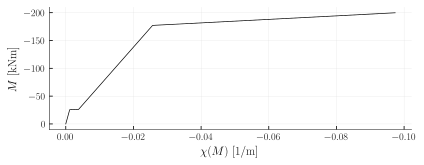

In [96]:
#| label: fig-mchi_diagramm
#| fig-cap: Momenten-Krümmungs-Diagramm, definiert durch die Querschnittsanalyse
M_R_num = np.float64(eq_M_R_num.rhs.evalf(4) /unit.m/unit.N)

chi_M_lambda = sp.lambdify((M, EI_I, EI_II, EI_III, M_r, M_y, M_R), eq_chi_M.rhs)

M_array = np.linspace(0,-M_R_num, 500)
chi_M_array = chi_M_lambda(M_array, *M_chi_params)

plt.plot(chi_M_array, M_array/1000, color='black')

# Anmerkungen hinzufügen


plt.annotate('$EI^I$', xy=(0.0009, 15000), xytext=(0, -10), textcoords='offset pixels')
plt.annotate("$EI^{II}$", xy=(0.01, 50000), xytext=(10, 10), textcoords='offset pixels')

plt.xlabel(f'${sp.latex(chi_M)}$ [1/m]')
plt.ylabel(f'${sp.latex(M)}$ [kNm]')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.savefig('images/momenten_krummung.svg')


plt.show()


Die erste Steigung im Diagramm beschreibt den ungerissenen Zustand 1. Dieser hat die Neigung von $EI^I$. Darauf folgt eine schlagartige Erhöhung der Krümmung ohne Steigerung des Moments. Dies entspricht dem Übergang vom gerissenen zum ungerissenen Zustand 2. Dabei steigt der Verlauf mit der Neigung $EI^{II}$ bis zum Fliessen der Bewehrung (Zustand 3). Ab diesem Punkt erfolgt ein verfestigendes Verhalten des Betonstahls und ein Plastifizieren der Betondruckzone bis zum Erreichen des Biegewiderstands (Zustand 4).

#### Zustandslinien der Krümmung

Die Momenten-Krümmungs-Beziehung wird nun zur Bestimmung des Krümmungsverlaufs verwendet. Der Biegemomentenverlauf $M(x)$, als Eingabe in die Funktion der Krümmung $\chi(M)$, führt zu den Zustandslinien der Krümmung in @fig-chi_x_diagramm. Dargestellt ist der Krümmungsverlauf exemplarisch für die Zustandslinien der Biegemomente aus der @fig-m_x.

In [97]:
chi_M_versuch_2 = []
for M_x in M_x_array:
    chi_M_versuch_2.append(chi_M_lambda(M_x, *M_chi_params))

chi_M_versatz_versuch_2 = []
for M_x in M_x_array_versatz:
    chi_M_versatz_versuch_2.append(chi_M_lambda(M_x, *M_chi_params))


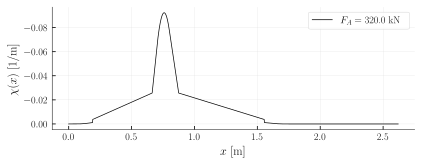

In [98]:
#| label: fig-chi_x_diagramm
#| fig-cap: Krümmungsverlauf entlang der Stabachse

plt.plot(x_array, chi_M_versuch_2[-1], color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
# plt.plot(x_array, chi_M_versatz_versuch_2[-1], color='darkgreen', label='Längszugkraft aus Querkraft')


plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'$\\chi(x)$ [1/m]')
plt.legend()
plt.gca().invert_yaxis()
plt.savefig('images/krummungsverlauf.svg')

plt.show()


Über dem Auflager $C$ ist für die dargestellte Laststufe der Biegewiderstand erreicht. Man befindet sich im Endbereich der Momenten-Krümmungs-Beziehung. Ebenfalls ersichtlich ist der sprunghafte Übergang zwischen dem ungerissenen und dem gerissenen Bereich.

#### Punktuelle Bestimmung der Verformung

Unter Anwendung der Arbeitsgleichung kann die Verformung nach @eq-arbeitsgleichung bestimmt werden. Die Position der fiktiven Einwirkung entspricht der Position der berechneten Verformung. Folglich ist an der Stelle $x=0.11$ eine Einzellast $\bar{F} = 1$ angesetzt, was zum virtuellen Biegemomentenverlauf in der @fig-m_x_diagramm_virtuell führt. 

In [99]:
M_x_array_fiktiv = M_x_lamb(1,x_array)

def M_fiktiv(x_array):
    index_of_max = np.argmin(M_x_array[-1])
    split_parts = [x_array[:index_of_max+1], x_array[index_of_max+1:]]
    verlauf1 = -split_parts[0]*(0.64/0.75)
    verlauf2 = min(verlauf1) + split_parts[1]*(0.64/0.92) - split_parts[1][0]*(0.64/0.92)
    verlauf2[verlauf2 >0] = 0 #Werte grösser als 0 sind null
    
    M_result = np.concatenate((verlauf1, verlauf2))
    return M_result


M_x_array_fiktiv = M_fiktiv(x_array)

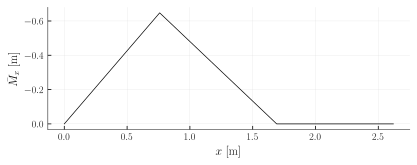

In [100]:
#| label: fig-m_x_diagramm_virtuell
#| fig-cap: Biegemomentenverlauf für den virtuellen Kräftezustand

plt.plot(x_array, M_x_array_fiktiv, color='black')
# plt.plot(x_array, M_x_array_versatz[0], color='darkgreen', label='Längszugkraft aus Querkraft')
plt.gca().invert_yaxis()

plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel('$\\bar{M}_x$ [m]')
plt.savefig('images/M_virtuell.svg')

plt.show()

In [101]:
w_1_m_chi = []

for i in range(0, len(M_x_array)):
    w_1_m_chi.append(np.trapz(M_x_array_fiktiv*chi_M_versuch_2[i], x_array))
    
    
    
w_1_m_chi_versatz = []

for i in range(0, len(M_x_array)):
    w_1_m_chi_versatz.append(np.trapz(M_x_array_fiktiv*chi_M_versatz_versuch_2[i], x_array))

Für die maximale Last beträgt die Deformation an der Stelle $w_1$ beispielsweise:

In [102]:
eq_w_1_m_chi = unit.convert_to(sp.Eq(w_1,w_1_m_chi[-1]*unit.m), unit.mm)
eq_w_1_m_chi.evalf(3)

w₁ = 15.3⋅millimeter

### Zugversteifung

Folgend wird die Modellbildung nach Marti aus dem @sec-zuggurtmodell angewendet. Die bisherige Betrachtung beschränkt sich auf einen schlagartigen Wechsel von ungerissen zu vollständig gerissen. Dabei wird der Bereich zwischen den Rissen ebenfalls als gerissen angenommen. Mittels der Zugversteifung wird ein theoretischer Rissabstand ermittelt und zwischen den Rissen eine versteifte Wirkung zwischen Betonstahl und Beton angenommen (Verbundwirkung). Die Krümmungsdifferenz beträgt:

In [103]:
#Formeln

eq_delta_chi_gamma = sp.Eq(delta_chi, sp.Mul(lamb / 2, f_ct * (1-rho_eff)/(rho_eff * E_s*(d-x_2)), evaluate=False))
eq_rho_eff = sp.Eq(rho_eff, (M_r*(d-x_2) * E_s / (f_ct * EI_II)+1-n)**-1)
eq_srm = sp.Eq(s_rm, lamb * diam_s*(1-rho_eff)/(4*rho_eff))
eq_sigma_sr0 = sp.Eq(sigma_sr0, F_s2 / A_s)
eq_w_r = sp.Eq(w_r, s_rm * (2*sigma_sr - lamb * sigma_sr0) / (2*E_s))

# Numerische Werte
eq_w_r_lamb = sp.lambdify((sigma_sr, sigma_sr0,s_rm, lamb, E_s), eq_w_r.rhs)
eq_delta_chi_gamma_num = unit.convert_to(eq_subs(eq_delta_chi_gamma, eq_rho_eff, eq_M_r_num, eq_EI_II_num, eq_n_num, eq_x_2_num, eq_d_num).subs(params), unit.m)
eq_rho_eff_num = eq_subs(eq_rho_eff, *Eq_list).subs(params)
eq_srm_num = eq_subs(eq_srm, eq_rho_eff_num).subs(params)



display(eq_delta_chi_gamma,eq_delta_chi_gamma_num.evalf(3))


Eq_list.extend([eq_delta_chi_gamma, eq_rho_eff, eq_srm,eq_sigma_sr0, eq_w_r])




                λ  f_ct⋅(1 - ρ_eff)
\Delta\chi(λ) = ─⋅─────────────────
                2 Eₛ⋅ρ_eff⋅(d - x₂)

                0.00131⋅λ
\Delta\chi(λ) = ─────────
                  meter  

Der mechanische Bewehrungsgehalt beschreibt sich zu:

In [104]:
display(eq_rho_eff, eq_rho_eff_num.evalf(3))

                   1           
ρ_eff = ───────────────────────
                 Eₛ⋅Mᵣ⋅(d - x₂)
        -n + 1 + ──────────────
                 EI__{II}⋅f_ct 

ρ_eff = 0.0753

Eine Abschätzung des Rissabstands ist folgend gezeigt. Dabei sind die Resultate für $\lambda = 1$ und $\lambda = 0.5$ berechnet.

In [105]:
display(eq_srm, eq_srm_num.subs(lamb, 1).evalf(3),eq_srm_num.subs(lamb, 0.5).evalf(3))

      \oslashₛ⋅λ⋅(1 - ρ_eff)
sᵣₘ = ──────────────────────
             4⋅ρ_eff        

sᵣₘ = 36.8⋅millimeter

sᵣₘ = 18.4⋅millimeter

Die Rissbreite ist abhängig von der Betonstahlspannung. Da vor dem Reissen des Betons keine Risse vorhanden sind, darf die Rissspannung von der Betonstahlspannung subtrahiert werden. Die Rissspannung lässt sich anhand der Betonstahlkraft aus dem Zustand 2 bestimmen.

In [106]:
display(eq_sigma_sr0)

       F_s,2
σₛᵣ₀ = ─────
         Aₛ 

Die Bestimmung der Rissbreite ist folgend gezeigt. Für die Stahlspannung wird die Fliessspannung eingesetzt.
Die Variation des Parameters $\lambda = 1 ; 0.5$ gilt hier ebenfalls.

In [107]:
eq_w_r_num_1 = eq_subs(eq_w_r, eq_srm_num, eq_sigma_sr0, eq_A_s_num, eq_F_s2, eq_sigma_s_2_num).subs(sigma_sr, f_sy).subs(lamb, 1).subs(params)
eq_w_r_num_05 = eq_subs(eq_w_r, eq_srm_num, eq_sigma_sr0, eq_sigma_s_2, eq_F_s2, eq_epsilon_s2_num, eq_EI_II_num, eq_n_num, eq_x_2_num, eq_d_num).subs(sigma_sr, f_sy).subs(lamb, 0.5).subs(params)

display(eq_w_r,eq_w_r_num_1.evalf(3),eq_w_r_num_05.evalf(3))

     sᵣₘ⋅(-λ⋅σₛᵣ₀ + 2⋅σₛᵣ)
wᵣ = ─────────────────────
              2⋅Eₛ        

wᵣ = 0.0933⋅millimeter

wᵣ = 0.0485⋅millimeter

Die Resultate sind vergleichbar mit den gemessenen Rissbreiten der Laststufe 12, die in @Jaeger2006 dargestellt sind. Diese liegen in einem Wertebereich von $0.15 \text{ mm}$ bis $0.3 \text{ mm}$. Die Rissweiten werden folglich unterschätzt.

In [108]:
# def druckzonenhöhe(M, M_chi_params):
#     if abs(M) <= M_chi_params[4]:
#         return eq_x_2_num.rhs.evalf(3).args[0]
    
#     if abs(M) >= M_chi_params[4]:
#         return eq_x_4_num.rhs.evalf(3).args[0]

# # Bestimmt die Druckzone anhand der Querschnittsanalyse
# druckzone_array = np.array([])
# for moment in M_array:
#     druckzone_array = np.append(druckzone_array, druckzonenhöhe(moment, M_chi_params))

# # Gibt den Abstand der Bewehrung zum Dehnungsnullpunkt
# abstand_bew_array = eq_d_num.rhs.args[0]- druckzone_array

# # Gibt die Dehnung der Bewehrung in Abhängigkeit der Krümmung
# epsilon_s_array_rissbreite = abs(chi_M_array) * abstand_bew_array/1000

# # Resultiert zur Spannung anhand der ermittelten Stahldehnung
# sigma_s_array = eq_sigma_epsilon_s_lamb(epsilon_s_array_rissbreite)


# # Rissbreite anhand der Stahlspannung

# w_r_a3v2_array_lager_nord = np.array([0.1,0.1,0.1,0.15,0.3]) 
# w_r_array = eq_w_r_lamb(sigma_s_array, eq_sigma_s_2_num.rhs.subs(params).evalf(3).args[0],eq_srm_num.rhs.evalf(3).subs(lamb,1).args[0], 1, params_plot[E_s])



In [109]:
eq_chi_M_zugversteifung = sp.Eq(chi_M, sp.Piecewise((0,M>=0),(M/ (EI_I), (M < 0) & (M > -eq_M_r.lhs)), (M/(EI_II)+eq_delta_chi_gamma_num.rhs.evalf(3)*unit.m, (M < -eq_M_r.lhs) & (M > -M_y)), (chi_M_linear.rhs , (M < -M_y) & (M > -M_R))))


Der Einfluss der Zugversteifung lässt sich direkt im Momenten-Krümmungs-Diagramm darstellen. Unter Berücksichtigung der beiden $\lambda$-Grenzwerte ist der Einfluss der Zugversteifung in @fig-mchi_diagramm_zugversteifung gezeigt.

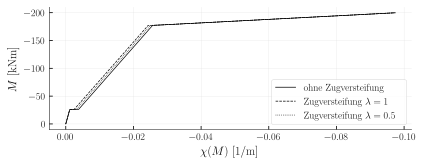

In [110]:
#| label: fig-mchi_diagramm_zugversteifung
#| fig-cap: Momenten-Krümmungs-Diagramm mit Zugversteifung

eq_chi_M_zugversteifung_lambda = sp.lambdify((M,lamb, EI_I, EI_II, EI_III, M_r, M_y, M_R), eq_chi_M_zugversteifung.rhs)

chi_M_zugversteifung_array = eq_chi_M_zugversteifung_lambda(M_array,1, *M_chi_params)
chi_M_zugversteifung_array_05 = eq_chi_M_zugversteifung_lambda(M_array,0.5, *M_chi_params)

plt.plot(chi_M_array, M_array/1000, color='black', label='ohne Zugversteifung')
plt.plot(chi_M_zugversteifung_array, M_array/1000, color='black', linestyle='dashed', label='Zugversteifung $\\lambda = 1$')
plt.plot(chi_M_zugversteifung_array_05, M_array/1000, color='black', linestyle='dotted',label='Zugversteifung $\\lambda = 0.5$')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.xlabel(f'${sp.latex(chi_M)}$ [1/m]')
plt.ylabel(f'${sp.latex(M)}$ [kNm]')
plt.legend()
plt.savefig('images/Momenten_krummung_zugversteift.svg')

plt.show()

Es zeigt sich ein steiferes Verhalten im gerissenen Bereich. Der Einfluss ist relativ gering.

## Analyse mit Fachwerksmodellen



In [111]:
import glob
import os

# Specify the folder path
file_path_fw = "docs\src\models\deformations"

# Get a list of all text files in the folder
file_paths = glob.glob(file_path_fw + "/*.txt")

# Initialize an empty dictionary to store the arrays
def_fachwerks = {}

# Open each file and read its contents
for file_path in file_paths:
    file_name = os.path.basename(file_path)
    with open(file_path, "r") as file:
        content = np.array([np.float64(line.strip()) for line in file])
        def_fachwerks[file_name] = content


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Pascal Gitz\AppData\Local\Temp\ipykernel_33592\77353004.py:5: SyntaxWarning: invalid escape sequence '\s'
  file_path_fw = "docs\src\models\deformations"


Abschliessend wird die Modellvorstellung aus dem @sec-fachwerk auf den Versuch angewendet. Die bisherigen Analysen beschränken sich auf eine Querschnittsbetrachtung. Der Kraftfluss lässt sich mit einem Spannungsfeld detaillierter verfolgen. Eine Einteilung in Parallelfelder und zentrierte Fächer ist in @fig-spannungsfelder_flach gezeigt. 

![Plattenstreifen mit Spannungsfeldern entsprechend dem Kraftfluss](../images/Spannungsfelder_flach.svg){#fig-spannungsfelder_flach}

Der Neigungswinkel der Betondruckstrebe wird in Anlehnung an die @eq-v_rds_sia262 zur Bestimmung des Querkraftwiderstands von vertikaler Schubbewehrung, gemäss Ziffer 4.3.3.4.3 @SIA2013a, bestimmt. Dabei wird die Querschnittsfläche der Schubbewehrung bestimmt.

In [112]:
n_schubbewehrung = 1
diam_schubbewehrung = 6 *unit.mm
n_schnittig = 7

eq_Asw_num = sp.Eq(A_sw, n_schubbewehrung * np.pi * diam_schubbewehrung**2 / 4 * n_schnittig)


eq_Asw_num.evalf(4)

                        2
A_s_w = 197.9⋅millimeter 

Der Hebelarm der inneren Kräfte des Zustands 4 wird angesetzt.

In [113]:
eq_z_4_num.evalf(3)

z₄ = 140.0⋅millimeter

Die Fliessspannung wird mit der Zugfestigkeit $f_{su}$ substituiert. Dies gewährleistet, dass die Schubbewehrung den elastischen Bereich verlässt. Der Querkraftwiderstand wird mit der maximal im System auftretenden Querkraft ersetzt. Abschliessend gilt $\alpha = \theta_{c3}$. Dies führt zu folgendem Neigungswinkel:

In [114]:
eq_V_R_sia = sp.Eq(V_R_s, A_sw / s_w * z_4 * f_su * sp.cot(theta_c3))
eq_theta_c_3_min = sp.Eq(theta_c3_min, sp.solve(eq_V_R_sia, theta_c3)[0])
eq_theta_c_3_min_num = eq_theta_c_3_min.subs({V_R_s:abs(min(V_x_array[-1]))*unit.N,
                                              s_w:8*unit.cm,
                                              A_sw: eq_Asw_num.rhs,
                                              f_su: params[f_su],
                                              z_4: eq_z_4_num.rhs})

display(eq_theta_c_3_min, eq_theta_c_3_min_num.simplify().evalf(3))

               ⎛ V_R,s⋅s_w  ⎞
θ_c3,min = acot⎜────────────⎟
               ⎝A_s_w⋅fₛᵤ⋅z₄⎠

θ_c3,min = 0.599

In [115]:
sp.Eq(theta_c3_min,unit.convert_to(eq_theta_c_3_min_num.simplify().evalf(3).rhs, unit.degree).evalf(3))

θ_c3,min = 34.3°

Der gewählte Neigungswinkel der Felder in der @fig-spannungsfelder_flach orientiert sich an dem berechneten Winkel. Ausserdem wurde darauf geachtet, dass alle Felder parallel zueinander angeordnet sind.

Durch das Zusammenfassen der Felder zu Stäben resultiert das Fachwerk in @fig-fachwerk_flach. Um aus dem Fachwerkmodell zutreffende Verformungen zu ermitteln, gilt es den Pendelstäben passende Dehnsteifigkeiten zuzuordnen. 

![Plattenstreifen mit Fachwerk durch das Zusammenfassen der Spannungsfelder](../images/Fachwerk_flach.svg){#fig-fachwerk_flach}

Dem Zuggurt ist die Spannungs-Dehnungs-Beziehung gemäss @fig-stahlkennlinie hinterlegt, sowie entspricht die Querschnittsfläche jener der Zugbewehrung.

Die Querschnittsfläche des Druckgurts entspricht der Höhe des plastischen Spannungsblocks des Zustands 4 multipliziert mit der Plattenstreifenbreite. Diese wird als konstant über sämtliche Stäbe des Druckgurtes angenommen. Des Weiteren ist die Spannungs-Dehnungs-Beziehung gemäss @fig-betonkennlinie angewendet.

Die Querschnittsfläche der Druckstreben entspricht der Streifenbreite multipliziert mit der Parallelfeldbreite, gezeigt in @fig-spannungsfelder_flach. Für die Diagonalen der nicht zentrierten Fächer ist vereinfacht die gleiche Querschnittsfläche hinterlegt. Dazu gilt die Spannungs-Dehnungs-Beziehung gemäss @fig-betonkennlinie.

Die Ständer bilden die Schubbewehrung ab. Die Querschnittsfläche resultiert aus der Anzahl an Schubdübeln im entsprechenden Spannungsfeld. Es gilt die Spannungs-Dehnungs-Beziehung gemäss @fig-stahlkennlinie. Die @fig-schubbew_fw_flach zeigt, dass pro Ständer drei Schubdübel umfasst sind.

![Plattenstreifen mit dargestellter Schubbewehrung und Spannungsfeldern](../images/Schubbewehrung_aufteilung_flach.svg){#fig-schubbew_fw_flach}

Mit der definierten Geometrie und den entsprechenden Steifigkeiten resultieren die Verformungen für die Maximallast zu $175.2 \text{ mm}$, aufgezeigt in der @fig-deformation_fw.

![Plattenstreifen mit verformten Fachwerk](../images/Def_Fachwerk.svg){#fig-deformation_fw}






## Vergleich der Modellvorstellungen

Abgeschlossen wird die Analyse des Dreipunktbiegeversuchs mit einer Gegenüberstellung der angewendeten Methoden. Der Fokus liegt auf dem Vergleich der experimentell ermittelten Verformungen und den Verformungen aus den Modellvorstellungen.

In [116]:
#Biegemomentenverlauf und Zugversteifung

##Krümmungsverlauf
chi_x_versuch_2_zugversteifung_lamba_1 = []
chi_x_versuch_2_zugversteifung_lamba_05 = []


for M_x in M_x_array:
    chi_x_versuch_2_zugversteifung_lamba_1.append(eq_chi_M_zugversteifung_lambda(M_x,1, *M_chi_params))
    chi_x_versuch_2_zugversteifung_lamba_05.append(eq_chi_M_zugversteifung_lambda(M_x,0.5, *M_chi_params))

# Verformung w1
w_1_m_chi_zugversteifung_1 = []
w_1_m_chi_zugversteifung_05 = []

for i in range(0,len(M_x_array)):
    w_1_m_chi_zugversteifung_1.append(np.trapz(M_x_array_fiktiv * chi_x_versuch_2_zugversteifung_lamba_1[i], x_array))
    w_1_m_chi_zugversteifung_05.append(np.trapz(M_x_array_fiktiv * chi_x_versuch_2_zugversteifung_lamba_05[i], x_array))





#Längszugkraft und Zugversteifung

##Krümmungsverlauf
chi_x_versuch_2_zugversteifung_lamba_1_versatz = []
chi_x_versuch_2_zugversteifung_lamba_05_versatz = []

for M_x in M_x_array_versatz:
    chi_x_versuch_2_zugversteifung_lamba_1_versatz.append(eq_chi_M_zugversteifung_lambda(M_x,1, *M_chi_params))
    chi_x_versuch_2_zugversteifung_lamba_05_versatz.append(eq_chi_M_zugversteifung_lambda(M_x,0.5, *M_chi_params))

## Verformung w1
w_1_m_chi_zugversteifung_1_versatz = []
w_1_m_chi_zugversteifung_05_versatz = []

for i in range(0,len(M_x_array_versatz)):
    w_1_m_chi_zugversteifung_1_versatz.append(np.trapz(M_x_array_fiktiv * chi_x_versuch_2_zugversteifung_lamba_1_versatz[i], x_array))
    w_1_m_chi_zugversteifung_05_versatz.append(np.trapz(M_x_array_fiktiv * chi_x_versuch_2_zugversteifung_lamba_05_versatz[i], x_array))
    



#konstante Steifigkeit
def chi_M_elastisch(M, EI):
    return M/EI


##Krümmungsverlauf
chi_x_versuch_2_konstant_gerissen = []
chi_x_versuch_2_konstant_ungerissen = []

for M_x in M_x_array:
    chi_x_versuch_2_konstant_ungerissen.append(chi_M_elastisch(M_x,np.float64(eq_EI.rhs.subs(params_plot))))
    chi_x_versuch_2_konstant_gerissen.append(chi_M_elastisch(M_x, np.float64(unit.convert_to(eq_EI_II_num.rhs, unit.m)/(unit.N*unit.m**2))))

## Momenten-Krümmungs-Beziehung
chi_M_ungerissen = chi_M_elastisch(M_array, np.float64(eq_EI.rhs.subs(params_plot)))
chi_M_gerissen = chi_M_elastisch(M_array, np.float64(unit.convert_to(eq_EI_II_num.rhs, unit.m)/(unit.N*unit.m**2)))

## Verformung w1
w_1_elastisch_gerissen = []
for Last in Laststufen:
    w_1_elastisch_gerissen.append(w_x_lamb(Last, 0.11, np.float64(unit.convert_to(eq_EI_II_num.rhs, unit.m)/(unit.N*unit.m**2))))
    
## Verformung w1 Norm
w_1_norm = []
for w in w_1_elastisch_ungerissen:
    w_1_norm.append(w_1_gerissen_norm_lamb(w))
    



#konstante Steifigkeit und Längszugkraft

##Krümmungsverlauf
chi_x_versuch_2_konstant_gerissen_versatz = []
chi_x_versuch_2_konstant_ungerissen_versatz = []

for M_x in M_x_array_versatz:
    chi_x_versuch_2_konstant_ungerissen_versatz.append(chi_M_elastisch(M_x,np.float64(eq_EI.rhs.subs(params_plot))))
    chi_x_versuch_2_konstant_gerissen_versatz.append(chi_M_elastisch(M_x, np.float64(unit.convert_to(eq_EI_II_num.rhs, unit.m)/(unit.N*unit.m**2))))


## Verformung w1
w_1_elastisch_ungerissen_versatz = []
w_1_elastisch_gerissen_versatz = []

for i in range(0,len(M_x_array_versatz)):
    w_1_elastisch_ungerissen_versatz.append(np.trapz(M_x_array_fiktiv * chi_x_versuch_2_konstant_ungerissen_versatz[i], x_array))
    w_1_elastisch_gerissen_versatz.append(np.trapz(M_x_array_fiktiv * chi_x_versuch_2_konstant_gerissen_versatz[i], x_array))
    
## Verformung w1 Norm
w_1_norm_versatz = []
for w in w_1_elastisch_ungerissen_versatz:
    w_1_norm_versatz.append(w_1_gerissen_norm_lamb(w))    

    
#Versuch Jaeger

w_1_versuch_A3V2 = [2.6, 10.2,10.3,11.5,11.6,13,13.1,14.9,15.1,23.8,24.3,35.4,39.4,40.1]
F_A_versuch_A3V2 = [0,211.3,204.1,241.9,236.8,271.3,260.3,300.6,287.7,324.6,293.5,331.2,325.1,301.8]
    


### Krümmung

Der Vergleich der Modellvorstellungen wird bei der Beschreibung der Krümmung der unterschiedlichen Modellvorstellungen gestartet. Aus dem Vergleich der Momenten-Krümmungs-Beziehung, dargestellt in @fig-mchi_diagramm_vergleich, lassen sich die Biegesteifigkeiten herauslesen. 

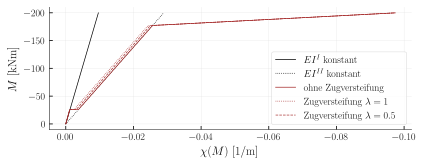

In [117]:
# | label: fig-mchi_diagramm_vergleich
# | fig-cap: Momenten-Krümmungs-Diagramm zum Vergleich der unterschiedlichen Modellvorstellungen

plt.plot(
    chi_M_ungerissen,
    M_array / 1000,
    color="black",
    linestyle="-",
    label="$EI^{I}$ konstant",
)
plt.plot(
    chi_M_gerissen,
    M_array / 1000,
    color="black",
    linestyle="dotted",
    label="$EI^{II}$ konstant",
)


plt.plot(chi_M_array, M_array / 1000, color="brown", label="ohne Zugversteifung")
plt.plot(
    chi_M_zugversteifung_array,
    M_array / 1000,
    color="brown",
    linestyle="dotted",
    label="Zugversteifung $\\lambda = 1$",
)
plt.plot(
    chi_M_zugversteifung_array_05,
    M_array / 1000,
    color="brown",
    linestyle="dashed",
    label="Zugversteifung $\\lambda = 0.5$",
)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.xlabel(f"${sp.latex(chi_M)}$ [1/m]")
plt.ylabel(f"${sp.latex(M)}$ [kNm]")
plt.ylim(10, -210)
plt.legend()
plt.savefig("images/momenten_krummung_vergleich.svg")

plt.show()

Die Unterschiede des Detaillierungsgrad der Beziehung zwischen den Modellvorstellungen ist deutlich erkennbar. Ebenso ersichtlich ist der geringe Einfluss der Zugversteifung auf die Biegesteifigkeit.

Die @fig-chi_x_diagramm_vergleich zeigt den Krümmungsverlauf für den Biegemomentenverlauf aus @fig-m_x. Ausgehend davon, dass die nicht-lineare Momenten-Krümmungs-Beziehung den effektiven Krümmungsverlauf präzise abbilden kann, zeigen die konstanten Biegesteifigkeiten deutliche Abweichungen. Der Fliessbereich über dem Auflager $C$ kann nicht abgebildet werden. Des Weiteren zeigt sich ein ausgeprägter gerissener Bereich, welcher mit der konstanten ungerissenen Biegesteifigkeit als deutlich zu steif eingeschätzt wird.

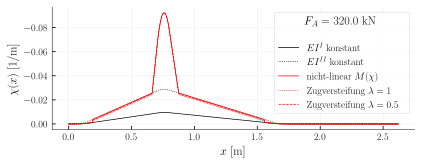

In [118]:
# | label: fig-chi_x_diagramm_vergleich
# | fig-cap: Krümmungsverlauf, mit unterschiedlichen Modellvorstellungen ohne Versatzmass

plt.plot(
    x_array,
    chi_x_versuch_2_konstant_ungerissen[-1],
    color="black",
    linestyle="-",
    label="$EI^{I}$ konstant",
)
plt.plot(
    x_array,
    chi_x_versuch_2_konstant_gerissen[-1],
    color="black",
    linestyle="dotted",
    label="$EI^{II}$ konstant",
)


plt.plot(
    x_array, chi_M_versuch_2[-1], color="red", linestyle="-", label=f"nicht-linear $M(\\chi)$"
)
plt.plot(
    x_array,
    chi_x_versuch_2_zugversteifung_lamba_1[-1],
    color="red",
    linestyle="dotted",
    label=f"Zugversteifung $\\lambda = 1$",
)
plt.plot(
    x_array,
    chi_x_versuch_2_zugversteifung_lamba_05[-1],
    color="red",
    linestyle="dashed",
    label=f"Zugversteifung $\\lambda = 0.5$",
)


plt.xlabel(f"${sp.latex(x)}$ [m]")
plt.ylabel(f"$\\chi(x)$ [1/m]")
plt.legend(title=f"$F_A =$ {Laststufen[-1]/1000} kN\n")
plt.gca().invert_yaxis()
plt.savefig("images/krummungsverlauf_zugversteift.svg")

plt.show()

Das analoge Vorgehen gilt für den Biegemomentenverlauf mit dem Versatzmass aus @fig-m_x_versatz. Dargestellt ist der Krümmungsverlauf für diesen in @fig-chi_x_diagramm_laengszugkraft.

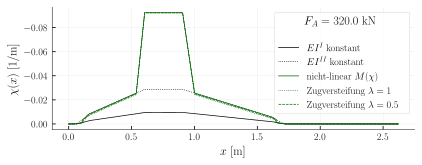

In [119]:
# | label: fig-chi_x_diagramm_laengszugkraft
# | fig-cap: Krümmungsverlauf, mit unterschiedlichen Modellvorstellungen mit Versatzmass


plt.plot(
    x_array,
    chi_x_versuch_2_konstant_ungerissen_versatz[-1],
    color="black",
    linestyle="-",
    label="$EI^{I}$ konstant",
)
plt.plot(
    x_array,
    chi_x_versuch_2_konstant_gerissen_versatz[-1],
    color="black",
    linestyle="dotted",
    label="$EI^{II}$ konstant",
)


plt.plot(
    x_array,
    chi_M_versatz_versuch_2[-1],
    color="darkgreen",
    linestyle="-",
    label="nicht-linear $M(\\chi)$",
)
plt.plot(
    x_array,
    chi_x_versuch_2_zugversteifung_lamba_1_versatz[-1],
    color="darkgreen",
    linestyle="dotted",
    label=f"Zugversteifung $\\lambda = 1$",
)
plt.plot(
    x_array,
    chi_x_versuch_2_zugversteifung_lamba_05_versatz[-1],
    color="darkgreen",
    linestyle="dashed",
    label=f"Zugversteifung $\\lambda = 0.5$",
)

plt.xlabel(f"${sp.latex(x)}$ [m]")
plt.ylabel(f"$\\chi(x)$ [1/m]")
plt.legend(title=f"$F_A =$ {Laststufen[-1]/1000} kN\n")
plt.gca().invert_yaxis()
plt.savefig("images/krummungsverlauf_zugversteift_laengszugkraft.svg")

plt.show()

Die Schwächen der konstanten Biegesteifigkeiten zeigen sich hier ebenfalls. Auffallend dabei ist der deutlich breitere Fliessbereich aus der nicht-linearen Momenten-Krümmungs-Beziehung. Die Verformung resultiert, wie in @eq-arbeitsgleichung beschrieben, aus der Integration des Krümmungsverlaufs. Folglich hat die Verbreiterung im Fliessbereich einen signifikanten Einfluss auf die Verformung.

In [120]:
def plot_vergleich(border=False, querkraft=False):
    if querkraft == False:
        plt.plot(
            np.array(w_1_elastisch_ungerissen) * 1000,
            Laststufen / 1000,
            color="black",
            linestyle="-",
            label="$EI^{I}$ konstant",
        )
        plt.plot(
            np.array(w_1_elastisch_gerissen) * 1000,
            Laststufen / 1000,
            color="black",
            linestyle="dotted",
            label="$EI^{II}$ konstant",
        )
        plt.plot(
            np.array(w_1_norm) * 1000,
            Laststufen / 1000,
            color="black",
            linestyle="dashed",
            label="Abschätzung Norm",
        )

        plt.plot(
            np.array(w_1_m_chi) * 1000,
            Laststufen / 1000,
            color="red",
            label="nicht-linear $M(\\chi)$",
        )
        plt.plot(
            np.array(w_1_m_chi_zugversteifung_1) * 1000,
            Laststufen / 1000,
            color="red",
            linestyle="dotted",
            label="Zugversteifung $\\lambda = 1$",
        )
        plt.plot(
            np.array(w_1_m_chi_zugversteifung_05) * 1000,
            Laststufen / 1000,
            color="red",
            linestyle="dashed",
            label="Zugversteifung $\\lambda = 0.5$",
        )

    if querkraft == True:
        plt.plot(
            np.array(w_1_elastisch_ungerissen_versatz) * 1000,
            Laststufen / 1000,
            color="black",
            linestyle="-",
            label="$EI^{I}$ konstant",
        )
        plt.plot(
            np.array(w_1_elastisch_gerissen_versatz) * 1000,
            Laststufen / 1000,
            color="black",
            linestyle="dotted",
            label="$EI^{II}$ konstant",
        )
        plt.plot(
            np.array(w_1_norm_versatz) * 1000,
            Laststufen / 1000,
            color="black",
            linestyle="dashed",
            label="Abschätzung Norm",
        )

        plt.plot(
            np.array(w_1_m_chi_versatz) * 1000,
            Laststufen / 1000,
            color="darkgreen",
            label="nicht-linear $M(\\chi)$",
        )
        plt.plot(
            np.array(w_1_m_chi_zugversteifung_1_versatz) * 1000,
            Laststufen / 1000,
            color="darkgreen",
            linestyle="dotted",
            label="Zugversteifung $\\lambda = 1$",
        )
        plt.plot(
            np.array(w_1_m_chi_zugversteifung_05_versatz) * 1000,
            Laststufen / 1000,
            color="darkgreen",
            linestyle="dashed",
            label="Zugversteifung $\\lambda = 0.5$",
        )

    plt.plot(
        np.array(w_1_versuch_A3V2) - w_1_versuch_A3V2[0],
        F_A_versuch_A3V2,
        color="blue",
        linestyle="-",
        label="Versuch A3V2",
    )

    if border == True:
        plt.xlim(0, max(np.array(w_1_m_chi_versatz) * 1000))

    plt.xlabel(f"${sp.latex(w_1)}$ [mm]")
    plt.ylabel(f"${sp.latex(F_A)}$ [kN]")
    plt.legend()
    if querkraft==True:
        plt.savefig("images/durchbiegung_vergleich_versatz.svg")
    if querkraft==False:
        plt.savefig("images/durchbiegung_vergleich.svg")
    plt.show()

### Verformung

Ein direkter Vergleich der Verformungen mit den gemessenen Versuchsresultaten ermöglicht die Erstellung von Last-Verformungs-Diagrammen. Dazu sind für die beschriebenen Modellvorstellungen die Verformungen für sämtliche Laststufen bestimmt worden. In @fig-last_verformung_vergleich und @fig-last_verformung_laengszug sind diese für die Biegemomentenverläufe aus der @fig-m_x und der @fig-m_x_versatz gezeigt. Welche sich in der Berücksichtigung des Versatzmasses unterscheiden. Die Verformung ist an der Stelle $w_1$ gemessen, dargestellt ist die Position in der @fig-system_2_lager.

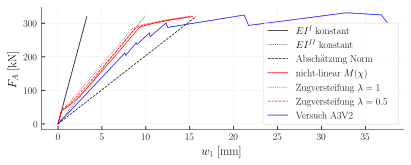

In [121]:
#| label: fig-last_verformung_vergleich
#| fig-cap: Last-Verformungs-Diagramm an der Stelle $w_1$ ohne Versatzmass 

plot_vergleich()

Es zeigt sich, dass mit einer konstanten ungerissenen Biegesteifigkeit die Verformungen nicht zufriedenstellend abbildbar sind. Bereits im gerissenen Bereich zeigen sich deutliche Abweichungen zu den Versuchsmessungen. Die Abweichungen sind für sämtliche Laststufen deutlich. Mit einer konstanten gerissenen Biegesteifigkeit nähert man sich den Versuchsergebnissen an. Die Differenzen zu den Versuchsmessungen steigen mit steigender Laststufe. Dies ist auf die fehlende Modellierung des Fliessbereichs zurückzuführen. Zudem werden die Verformungen für sämtliche Laststufen leicht unterschätzt. Die Darstellung der Normabschätzung zeigt eine konservative Abschätzung der Verformungen. Die Verformungen werden für sämtliche Laststufen bis zum Erreichen des Fliessbereichs überschätzt. Bei der Berücksichtigung der nicht-linearen Momenten-Krümmungs-Beziehung (in rot dargestellt), lässt sich das Verformungsverhalten des Versuchs annähernd abbilden. Die Modellvorstellung bildet ein zu steifes Verhalten ab. Die Zugversteifung wirkt der Modellgenauigkeit entgegen. Sowie zeigen sich deutliche Abweichungen im Bereich der Traglast.

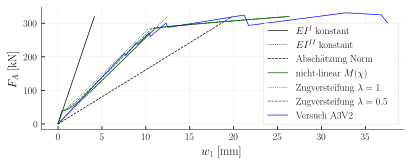

In [122]:
# | label: fig-last_verformung_laengszug
# | fig-cap: Last-Verformungs-Diagramm an der Stelle $w_1$ mit Versatzmass 

plot_vergleich(querkraft=True)

Die @fig-last_verformung_laengszug zeigt sämtliche Berechnungsmethoden unter Berücksichtigung der Längszugkraft aus der Querkraft, sprich dem Versatzmass. Die konstante Biegesteifigkeiten zeigen die gleichen Mängel wie bei einer Nichtberücksichtigung des Versatzmass. Ebenfalls zeigt die Normabschätzung eine deutliche Überschätzung der Verformungen bis zum Erreichen der Fliessgrenze im Betonstahl. Die Verformungen mittels der nicht-linearen Momenten-Krümmungs-Beziehung zeigen eine präzise Übereinstimmung mit den Versuchsmessungen. Einzig unter der Höchstlast ist eine Abweichung vorhanden. Das Ergebnis ist jedoch vollumfänglich zufriedenstellend. Abschliessend lässt sich festhalten, dass die Berücksichtigung des Versatzmass zu einem weicheren Systemverhalten führt. 


Folgend sind die Verformungen aus dem Fachwerkmodell dargestellt. Durch die Aufteilung der Traganteile in die einzelnen Fachwerkstäbe lassen sich Verformungsanteile aus der Schubbewehrung, der Gurte und der Betondruckstreben gesondert ermitteln. Beispielsweise lässt sich der Anteil der Schubbewehrung durch das Setzen der Steifigkeit der übrigen Stäbe auf ein infinit grosses Mass bestimmen. Dargestellt ist dies in @fig-last_verformung_fachwerk.



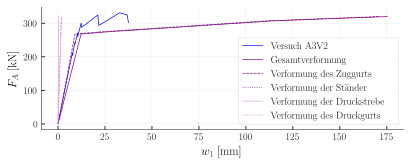

In [123]:
# | label: fig-last_verformung_fachwerk
# | fig-cap: Last-Verformungs-Diagramm an der Stelle $w_1$ mit Fachwerksmodell, Fachwerkshöhe von 140 mm 


Laststufen_FW = np.linspace(1000, 320 * 10**3, 50)


plt.plot(
    np.array(w_1_versuch_A3V2) -w_1_versuch_A3V2[0],
    F_A_versuch_A3V2,
    color="blue",
    linestyle="-",
    label="Versuch A3V2",
)

plt.plot(
    np.array(def_fachwerks['A3_deformation_results_FEM_tot.txt']) * 1000,
    Laststufen_FW / 1000,
    color="purple",
    linestyle="-",
    label="Gesamtverformung",
)
plt.plot(
    np.array(def_fachwerks['A3_deformation_results_FEM_zuggurt.txt']) * 1000,
    Laststufen_FW / 1000,
    color="purple",
    linestyle="--",
    label="Verformung des Zuggurts",
)
plt.plot(
    np.array(def_fachwerks['A3_deformation_results_FEM_schubbewehrung.txt']) * 1000,
    Laststufen_FW / 1000,
    color="purple",
    linestyle="dotted",
    label="Verformung der Ständer",
)
plt.plot(
    np.array(def_fachwerks['A3_deformation_results_FEM_druckstrebe.txt']) * 1000,
    Laststufen_FW / 1000,
    color="plum",
    linestyle="-",
    label="Verformung der Druckstrebe",
)
plt.plot(
    np.array(def_fachwerks['A3_deformation_results_FEM_druckgurt.txt']) * 1000,
    Laststufen_FW / 1000,
    color="plum",
    linestyle="--",
    label="Verformung des Druckgurts",
)


plt.xlabel(f"${sp.latex(w_1)}$ [mm]")
plt.ylabel(f"${sp.latex(F_A)}$ [kN]")

# plt.xlim(0,max(np.array(w_1_versuch_A3V2)))

plt.legend()
plt.savefig("images/durchbiegung_vergleich_fachwerk.svg")

plt.show()

Das Fachwerkmodell beschreibt den Verlauf bis zum Fliesspunkt der Zugbewehrung ausreichend präzise. Die maximale Verformung jedoch, die mit der rechnerisch ermittelten Höhe, sprich dem Hebelarm der inneren Kräfte aus der Querschnittsanalyse, erzielt wird, überschreitet das Ziel bei Weitem. Des Weiteren zeigt sich, dass die Verformung primär aus dem Zuggurt resultiert. Die Schubbewehrung, Druckstrebe und der Druckgurt haben einen vernachlässigbaren Einfluss. Das Fachwerkmodell reagiert äusserst sensibel auf den gewählten Abstand der Gurtungen (Hebelarm der inneren Kräfte). Basierend auf dieser Tatsache ist in @fig-last_verformung_fachwerk_z_var der Verformungsverlauf mit der Anpassung der Fachwerskhöhe auf $160\text{ mm}$ gezeigt. Diese wurde nicht rechnerisch ermittelt, bzw. wurde diese mittels Iteration bis zum Erreichen des passenden Verlaufs bestimmt.

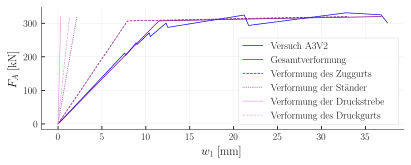

In [124]:
# | label: fig-last_verformung_fachwerk_z_var
# | fig-cap: Last-Verformungs-Diagramm an der Stelle $w_1$ mit Fachwerksmodell, Fachwerkshöhe von 160 mm 


Laststufen_FW = np.linspace(1000, 320 * 10**3, 50)


plt.plot(
    np.array(w_1_versuch_A3V2) -w_1_versuch_A3V2[0],
    F_A_versuch_A3V2,
    color="blue",
    linestyle="-",
    label="Versuch A3V2",
)

plt.plot(
    np.array(def_fachwerks['A3_hoch_deformation_results_FEM_tot.txt']) * 1000,
    Laststufen_FW / 1000,
    color="purple",
    linestyle="-",
    label="Gesamtverformung",
)
plt.plot(
    np.array(def_fachwerks['A3_hoch_deformation_results_FEM_zuggurt.txt']) * 1000,
    Laststufen_FW / 1000,
    color="purple",
    linestyle="--",
    label="Verformung des Zuggurts",
)
plt.plot(
    np.array(def_fachwerks['A3_hoch_deformation_results_FEM_schubbewehrung.txt']) * 1000,
    Laststufen_FW / 1000,
    color="purple",
    linestyle="dotted",
    label="Verformung der Ständer",
)
plt.plot(
    np.array(def_fachwerks['A3_hoch_deformation_results_FEM_druckstrebe.txt']) * 1000,
    Laststufen_FW / 1000,
    color="plum",
    linestyle="-",
    label="Verformung der Druckstrebe",
)
plt.plot(
    np.array(def_fachwerks['A3_hoch_deformation_results_FEM_druckgurt.txt']) * 1000,
    Laststufen_FW / 1000,
    color="plum",
    linestyle="--",
    label="Verformung des Druckgurts",
)


plt.xlabel(f"${sp.latex(w_1)}$ [mm]")
plt.ylabel(f"${sp.latex(F_A)}$ [kN]")

# plt.xlim(0,max(np.array(w_1_versuch_A3V2)))

plt.legend()
plt.savefig("images/durchbiegung_vergleich_fachwerk_var_z.svg")

plt.show()

Das Modell mit der angepassten Höhe beschreibt den Verformungsverlauf vollumfänglich präzise. Die Verformungsanteile aus der Schubbewehrung, dem Druckgurt und der Druckstrebe sind auch hier nicht signifikant.